# Visualização de dados. 

## 1) Coleta de dados. 

In [261]:
# Importing libraries
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt #para gráficos
from sklearn import tree #Tem uma estrutura de árvore que será usada
from sklearn.tree import DecisionTreeClassifier #Classificador que gera uma árvore de regras

In [262]:
PARAMETROS_ESPECIES = ['Adelie','Gentoo','Chinstrap']

In [263]:
# Reading file.
initial_data = pd.read_csv("base_de_dados/penguins.csv")
initial_data

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

Vemos que tem dados invalidos no Dataframe, onde está escrito NaN.
Vamos mostrar os tipos de dados coletado no Dataframe.

We see that have invalid data in DataFrame, where is write NaN.
We'll go to show data types of collected DataFrame.

In [183]:
print(initial_data.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


Então aqui tmeos 3 do tipo categórico, e 4 do tipo numérico contínuo.

So here we have three of categorical type 
and four of continuous numerical type.

Quantity

In [184]:
quantity = len(initial_data)
clean_quantity = len(initial_data.dropna(axis=0))
error_quantity = quantity - clean_quantity

print(f"Total quantity in Dataframe: {quantity}")
print(f"Total quantity with error in Dataframe: {error_quantity}")
print(f"Total quantity without error in Dataframe: {clean_quantity}")

Total quantity in Dataframe: 344
Total quantity with error in Dataframe: 11
Total quantity without error in Dataframe: 333


#### Converter categóricos para números.
 
#### Convert categoricals to numbers.

In [185]:
# 0 - Adelie. 1 - Gentoo. 2 - Chinstrap.
for i in range(len(initial_data)):
    x = initial_data.at[i,'species']
    if(x == "Adelie"):
        initial_data.at[i,'species'] = int(0)
    elif(x == "Gentoo"):
        initial_data.at[i,'species'] = int(1)
    elif(x == "Chinstrap"):
        initial_data.at[i,'species'] = int(2)
initial_data

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0         0  Torgersen            39.1           18.7              181.0   
1         0  Torgersen            39.5           17.4              186.0   
2         0  Torgersen            40.3           18.0              195.0   
3         0  Torgersen             NaN            NaN                NaN   
4         0  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339       1     Biscoe             NaN            NaN                NaN   
340       1     Biscoe            46.8           14.3              215.0   
341       1     Biscoe            50.4           15.7              222.0   
342       1     Biscoe            45.2           14.8              212.0   
343       1     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

In [186]:
# 0 - Biscoe. 1 - Dream. 2 - Torgersen.
for i in range(len(initial_data)):
    x = initial_data.at[i,'island']
    
    if(x == "Biscoe"):
        initial_data.at[i,'island'] = int(0)
    elif(x == "Dream"):
        initial_data.at[i,'island'] = int(1)
    elif(x == "Torgersen"):
        initial_data.at[i,'island'] = int(2)
initial_data

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0         0      2            39.1           18.7              181.0   
1         0      2            39.5           17.4              186.0   
2         0      2            40.3           18.0              195.0   
3         0      2             NaN            NaN                NaN   
4         0      2            36.7           19.3              193.0   
..      ...    ...             ...            ...                ...   
339       1      0             NaN            NaN                NaN   
340       1      0            46.8           14.3              215.0   
341       1      0            50.4           15.7              222.0   
342       1      0            45.2           14.8              212.0   
343       1      0            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
3            NaN     NaN  
4         3450.0  FEMALE  
..           ...     ...  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[344 rows x 7 columns]

In [187]:
# 0 - MALE. 1 - FEMALE.
for i in range(len(initial_data)):
    x = initial_data.at[i,'sex']

    if(x == "MALE"):
        initial_data.at[i,'sex'] = int(0)
    elif(x == "FEMALE"):
        initial_data.at[i,'sex'] = int(1)
        
initial_data

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0         0      2            39.1           18.7              181.0   
1         0      2            39.5           17.4              186.0   
2         0      2            40.3           18.0              195.0   
3         0      2             NaN            NaN                NaN   
4         0      2            36.7           19.3              193.0   
..      ...    ...             ...            ...                ...   
339       1      0             NaN            NaN                NaN   
340       1      0            46.8           14.3              215.0   
341       1      0            50.4           15.7              222.0   
342       1      0            45.2           14.8              212.0   
343       1      0            49.9           16.1              213.0   

     body_mass_g  sex  
0         3750.0    0  
1         3800.0    1  
2         3250.0    1  
3            NaN  NaN  
4         3450.0    1  
..           ...  ...  
339          NaN  NaN  
340       4850.0    1  
341       5750.0    0  
342       5200.0    1  
343       5400.0    0  

[344 rows x 7 columns]

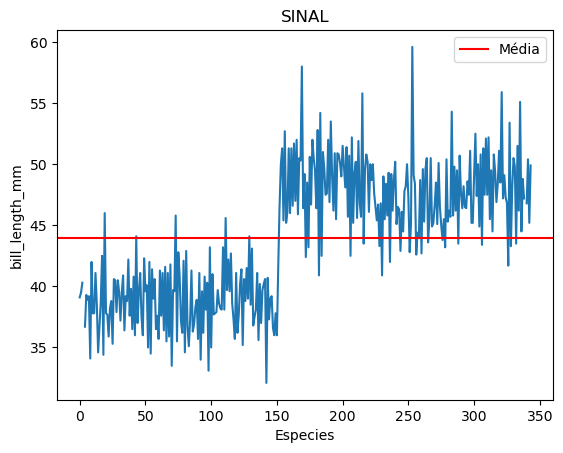

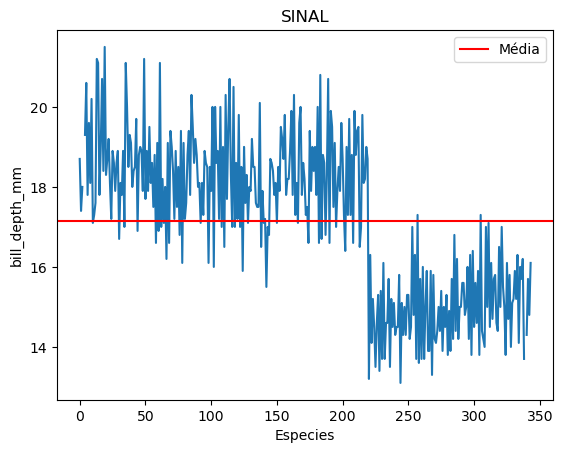

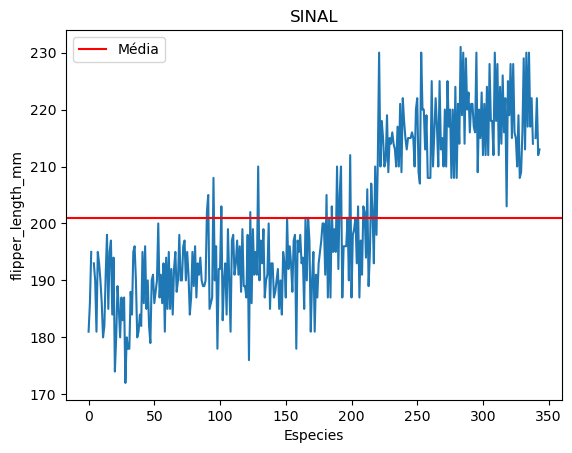

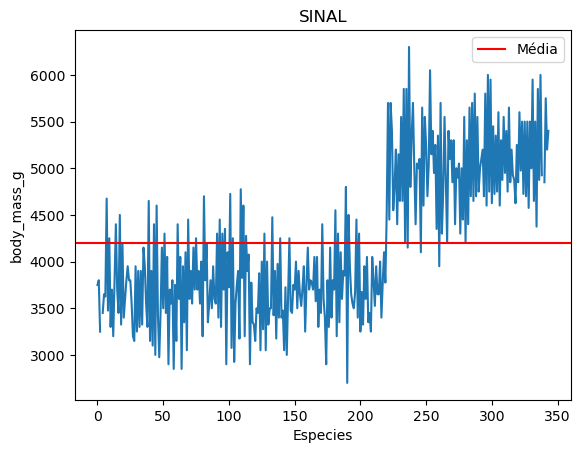

In [188]:
for a in range(4):
    plt.plot(initial_data[initial_data.columns[a+2]])
    plt.axhline(y=initial_data[initial_data.columns[a+2]].mean(), color='r', label='Média')
    plt.title(f"SINAL")
    plt.xlabel("Especies")
    plt.ylabel(f"{initial_data.columns[a+2]}")
    plt.legend()
    plt.show()

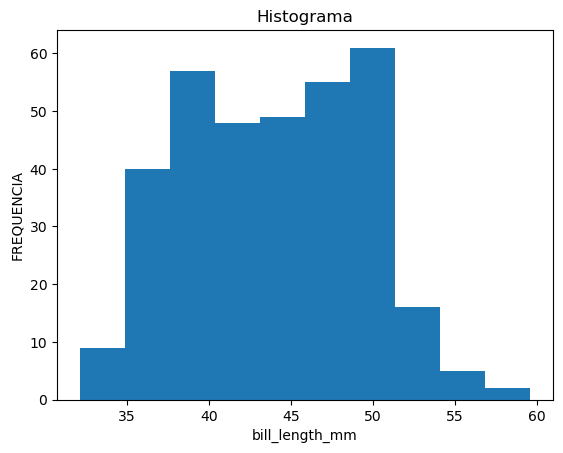

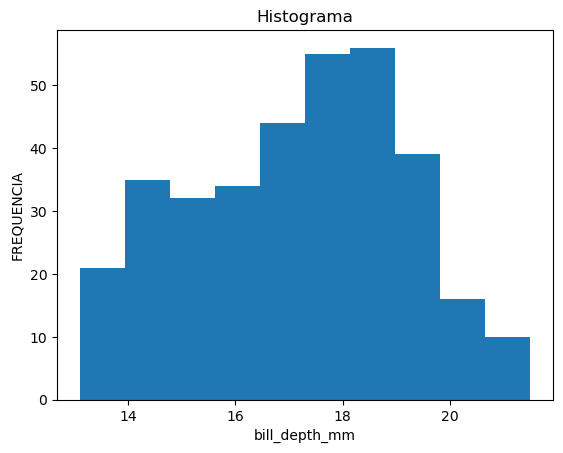

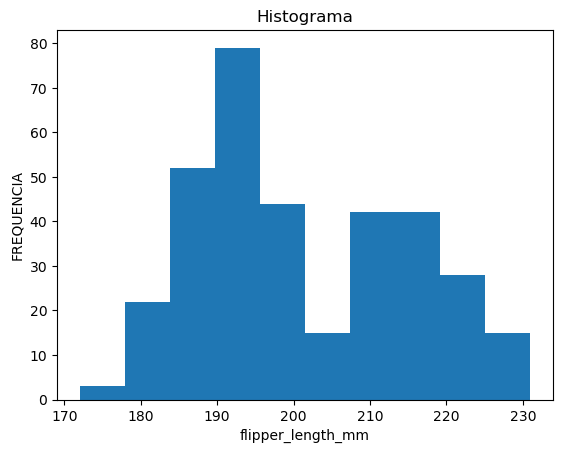

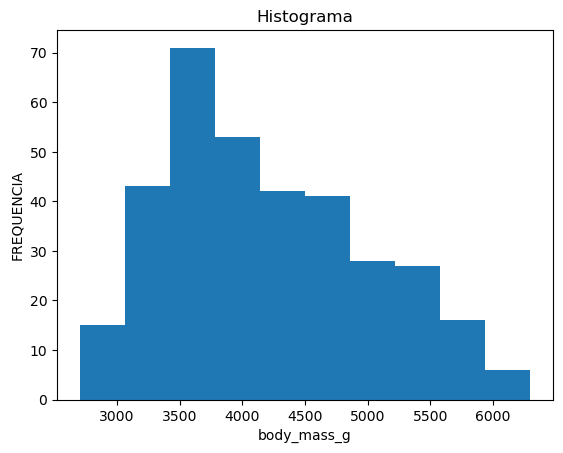

In [189]:
for a in range(4):
  
    plt.hist(initial_data[initial_data.columns[a+2]])
    plt.title(f"Histograma")
    plt.xlabel(f"{initial_data.columns[a+2]}")
    plt.ylabel("FREQUENCIA")
    plt.show()

<Axes: >

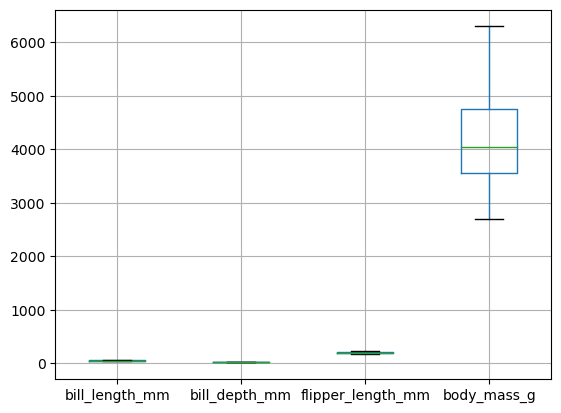

In [190]:
initial_data.boxplot()

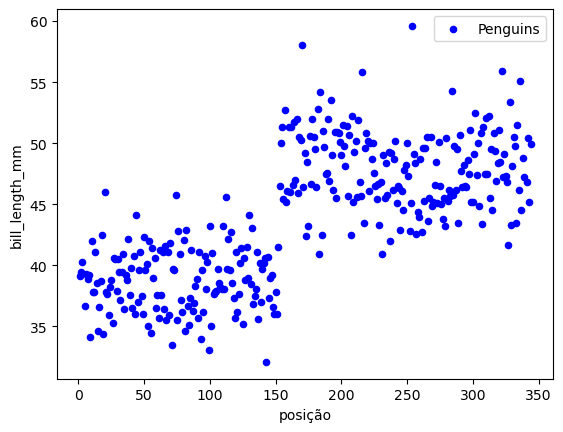

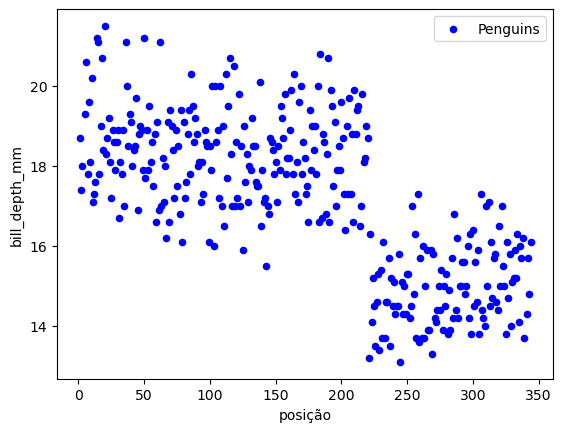

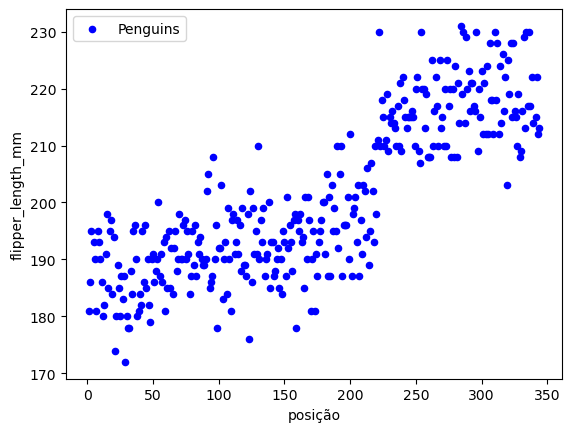

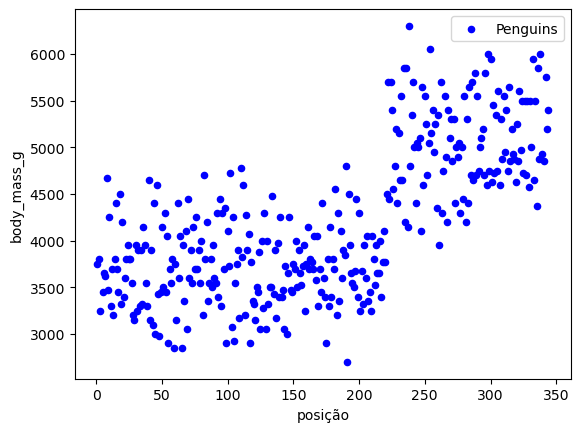

In [191]:
initial_data['posição'] = list(range(1, len(initial_data)+1))
for i in range(4):
    initial_data.plot.scatter('posição',i+2,color='b', label='Penguins')

In [192]:
initial_data = initial_data.drop('posição', axis=1)

## 2) Limpeza dos dados.

#### Localizar erros. 
#### locate errors

In [193]:
error_quantity_attributes = 0

row = []
columns = []

for x in range(7):
    
    for i in range(quantity):
        y = initial_data[initial_data.columns[x]][i]
        
        if(pd.isnull(y)):
            error_quantity_attributes += 1
            
            row.append(i)
            columns.append(x)

print(f"\nError quantity attributes:", error_quantity_attributes)

row.sort()
print(f"\nNº of lines: \t\t{row}")
print(f"Nº of columns: \t\t{columns}")

row = list(set(row))
row.sort()
print(f"\nIndex with error: \t{row}")


Error quantity attributes: 19

Nº of lines: 		[3, 3, 3, 3, 3, 8, 9, 10, 11, 47, 246, 286, 324, 336, 339, 339, 339, 339, 339]
Nº of columns: 		[2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

Index with error: 	[3, 8, 9, 10, 11, 47, 246, 286, 324, 336, 339]


#### Filtrando especies.

In [194]:
ESPECIES_Adelie = initial_data.query("species == 0")
ESPECIES_Gentoo = initial_data.query("species == 1")
ESPECIES_Chinstrap = initial_data.query("species == 2")

#### Detalhando ilhas por especies.

In [195]:
print(f"\n ESPECIE Adelie: \n{ESPECIES_Adelie.value_counts('island')}")
print(f"\n ESPECIE Gentoo: \n{ESPECIES_Gentoo.value_counts('island')}") # ok
print(f"\n ESPECIE Chinstrap: \n{ESPECIES_Chinstrap.value_counts('island')}")


 ESPECIE Adelie: 
island
1    56
2    52
0    44
dtype: int64

 ESPECIE Gentoo: 
island
0    124
dtype: int64

 ESPECIE Chinstrap: 
island
1    68
dtype: int64


#### Filtrando especies e ilhas.

In [196]:
ESPECIES_Gentoo_Biscoe = ESPECIES_Gentoo.query("island == 0")

ESPECIES_Chinstrap_Dream = ESPECIES_Chinstrap.query("island == 1")

ESPECIES_Adelie_Biscoe = ESPECIES_Adelie.query("island == 0")
ESPECIES_Adelie_Dream = ESPECIES_Adelie.query("island == 1")
ESPECIES_Adelie_Torgersen = ESPECIES_Adelie.query("island == 2")

## Dado estatistícos.
#### Especie Adelie na Ilha Biscoe.

In [197]:
print("Especie Adelie e Ilha Biscoe.")
print("\nTotal:")
print(ESPECIES_Adelie_Biscoe.describe())
print("\nMale:")
print(ESPECIES_Adelie_Biscoe.query("sex == 0").describe())
print("\nFemale:")
print(ESPECIES_Adelie_Biscoe.query("sex == 1").describe())

print("\n\nVariancia\n")
l = []
for i in range(len(ESPECIES_Adelie.columns) - 3):
    media_PROFUNDIDADE_BICO_MM = ESPECIES_Adelie_Biscoe[ESPECIES_Adelie.columns[i+2]].var()
    media_PROFUNDIDADE_BICO_MM_M = ESPECIES_Adelie_Biscoe.query("sex == 0")[ESPECIES_Adelie.columns[i+2]].var()
    media_PROFUNDIDADE_BICO_MM_F = ESPECIES_Adelie_Biscoe.query("sex == 1")[ESPECIES_Adelie.columns[i+2]].var()
    l.append(pd.Series([media_PROFUNDIDADE_BICO_MM, media_PROFUNDIDADE_BICO_MM_M, media_PROFUNDIDADE_BICO_MM_F], index=["Total", "Male", "FEMALE"]))
print(pd.DataFrame(l, index=[ESPECIES_Adelie.columns[2],ESPECIES_Adelie.columns[3],ESPECIES_Adelie.columns[4],ESPECIES_Adelie.columns[5]]))

print("\n\nModa\n")
l = []
for i in range(len(ESPECIES_Adelie.columns) - 3):
    media_PROFUNDIDADE_BICO_MM = ESPECIES_Adelie_Biscoe[ESPECIES_Adelie.columns[i+2]].mode().iloc[0]
    media_PROFUNDIDADE_BICO_MM_M = ESPECIES_Adelie_Biscoe.query("sex == 0")[ESPECIES_Adelie.columns[i+2]].mode().iloc[0]
    media_PROFUNDIDADE_BICO_MM_F = ESPECIES_Adelie_Biscoe.query("sex == 1")[ESPECIES_Adelie.columns[i+2]].mode().iloc[0]
    l.append(pd.Series([media_PROFUNDIDADE_BICO_MM, media_PROFUNDIDADE_BICO_MM_M, media_PROFUNDIDADE_BICO_MM_F], index=["Total", "Male", "FEMALE"]))
print(pd.DataFrame(l, index=[ESPECIES_Adelie.columns[2],ESPECIES_Adelie.columns[3],ESPECIES_Adelie.columns[4],ESPECIES_Adelie.columns[5]]))

qtd_M = ESPECIES_Adelie_Biscoe.query("sex == 0")
qtd_F = ESPECIES_Adelie_Biscoe.query("sex == 1")

print(f"\nQuantidade de Machos: {len(qtd_M)}")
print(f"Quantidade de Femeas:{len(qtd_F)}")
print(f"Total :{len(qtd_F) + len(qtd_M)}")


Especie Adelie e Ilha Biscoe.

Total:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       44.000000      44.000000          44.000000    44.000000
mean        38.975000      18.370455         188.795455  3709.659091
std          2.480916       1.188820           6.729247   487.733722
min         34.500000      16.000000         172.000000  2850.000000
25%         37.675000      17.650000         184.750000  3387.500000
50%         38.700000      18.450000         189.500000  3750.000000
75%         40.700000      19.025000         193.000000  3975.000000
max         45.600000      21.100000         203.000000  4775.000000

Male:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       22.000000      22.000000          22.000000    22.000000
mean        40.590909      19.036364         190.409091  4050.000000
std          2.006634       0.879689           6.463517   355.567956
min         37.600000      17.200000         180.000000  3

#### ESPECIE Adelie na Ilha Dream.

In [198]:
print("ESPECIES Adelie Dream.")
print("\nTotal:")
print(ESPECIES_Adelie_Dream.describe())
print("\nMale:")
print(ESPECIES_Adelie_Dream.query("sex == 0").describe())
print("\nFemale:")
print(ESPECIES_Adelie_Dream.query("sex == 1").describe())
    
print("\n\nVariancia\n")
l = []
for i in range(len(ESPECIES_Adelie.columns) - 3):
    media_PROFUNDIDADE_BICO_MM = ESPECIES_Adelie_Dream[ESPECIES_Adelie.columns[i+2]].var()
    media_PROFUNDIDADE_BICO_MM_M = ESPECIES_Adelie_Dream.query("sex == 0")[ESPECIES_Adelie.columns[i+2]].var()
    media_PROFUNDIDADE_BICO_MM_F = ESPECIES_Adelie_Dream.query("sex == 1")[ESPECIES_Adelie.columns[i+2]].var()
    l.append(pd.Series([media_PROFUNDIDADE_BICO_MM, media_PROFUNDIDADE_BICO_MM_M, media_PROFUNDIDADE_BICO_MM_F], index=["Total", "Male", "FEMALE"]))
print(pd.DataFrame(l, index=[ESPECIES_Adelie.columns[2],ESPECIES_Adelie.columns[3],ESPECIES_Adelie.columns[4],ESPECIES_Adelie.columns[5]]))

print("\n\nModa\n")
l = []
for i in range(len(ESPECIES_Adelie.columns) - 3):
    media_PROFUNDIDADE_BICO_MM = ESPECIES_Adelie_Dream[ESPECIES_Adelie.columns[i+2]].mode().iloc[0]
    media_PROFUNDIDADE_BICO_MM_M = ESPECIES_Adelie_Dream.query("sex == 0")[ESPECIES_Adelie.columns[i+2]].mode().iloc[0]
    media_PROFUNDIDADE_BICO_MM_F = ESPECIES_Adelie_Dream.query("sex == 1")[ESPECIES_Adelie.columns[i+2]].mode().iloc[0]
    l.append(pd.Series([media_PROFUNDIDADE_BICO_MM, media_PROFUNDIDADE_BICO_MM_M, media_PROFUNDIDADE_BICO_MM_F], index=["Total", "Male", "FEMALE"]))
print(pd.DataFrame(l, index=[ESPECIES_Adelie.columns[2],ESPECIES_Adelie.columns[3],ESPECIES_Adelie.columns[4],ESPECIES_Adelie.columns[5]]))

qtd_M = ESPECIES_Adelie_Dream.query("sex == 0")
qtd_F = ESPECIES_Adelie_Dream.query("sex == 1")

print(f"\nQuantidade de Machos: {len(qtd_M)}")
print(f"Quantidade de Femeas:{len(qtd_F)}")
print(f"Total :{len(qtd_F) + len(qtd_M)}")



ESPECIES Adelie Dream.

Total:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       56.000000      56.000000          56.000000    56.000000
mean        38.501786      18.251786         189.732143  3688.392857
std          2.465359       1.133617           6.585083   455.146437
min         32.100000      15.500000         178.000000  2900.000000
25%         36.750000      17.500000         185.000000  3387.500000
50%         38.550000      18.400000         190.000000  3575.000000
75%         40.375000      18.825000         193.000000  3981.250000
max         44.100000      21.200000         208.000000  4650.000000

Male:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       28.000000      28.000000          28.000000    28.000000
mean        40.071429      18.839286         191.928571  4045.535714
std          1.748196       1.033276           6.803749   330.547636
min         36.300000      17.000000         178.000000  3425.000

In [199]:
ESPECIES_Adelie_Dream.query("sex != 0 and sex != 1")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
47       0      1            37.5           18.9              179.0   

    body_mass_g  sex  
47       2975.0  NaN

Femea. Female.

In [200]:
ESPECIES_Adelie_Dream.query("body_mass_g <= 3600  and bill_length_mm < 40.6")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
30        0      1            39.5           16.7              178.0   
32        0      1            39.5           17.8              188.0   
34        0      1            36.4           17.0              195.0   
38        0      1            37.6           19.3              181.0   
40        0      1            36.5           18.0              182.0   
42        0      1            36.0           18.5              186.0   
44        0      1            37.0           16.9              185.0   
47        0      1            37.5           18.9              179.0   
48        0      1            36.0           17.9              190.0   
84        0      1            37.3           17.8              191.0   
87        0      1            36.9           18.6              189.0   
89        0      1            38.9           18.8              190.0   
90        0      1            35.7           18.0              202.0   
92        0      1            34.0           17.1              185.0   
94        0      1            36.2           17.3              187.0   
98        0      1            33.1           16.1              178.0   
132       0      1            36.8           18.5              193.0   
134       0      1            38.1           17.6              187.0   
136       0      1            35.6           17.5              191.0   
138       0      1            37.0           16.5              185.0   
140       0      1            40.2           17.1              193.0   
142       0      1            32.1           15.5              188.0   
144       0      1            37.3           16.8              192.0   
147       0      1            36.6           18.4              184.0   
148       0      1            36.0           17.8              195.0   

     body_mass_g  sex  
30        3250.0    1  
32        3300.0    1  
34        3325.0    1  
38        3300.0    1  
40        3150.0    1  
42        3100.0    1  
44        3000.0    1  
47        2975.0  NaN  
48        3450.0    1  
84        3350.0    1  
87        3500.0    1  
89        3600.0    1  
90        3550.0    1  
92        3400.0    1  
94        3300.0    1  
98        2900.0    1  
132       3500.0    1  
134       3425.0    1  
136       3175.0    1  
138       3400.0    1  
140       3400.0    1  
142       3050.0    1  
144       3000.0    1  
147       3475.0    1  
148       3450.0    1

Macho. Male.

In [201]:
ESPECIES_Adelie_Dream.query("body_mass_g > 3425") ## avaliar

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
31        0      1            37.2           18.1              178.0   
33        0      1            40.9           18.9              184.0   
35        0      1            39.2           21.1              196.0   
36        0      1            38.8           20.0              190.0   
37        0      1            42.2           18.5              180.0   
39        0      1            39.8           19.1              184.0   
41        0      1            40.8           18.4              195.0   
43        0      1            44.1           19.7              196.0   
45        0      1            39.6           18.8              190.0   
48        0      1            36.0           17.9              190.0   
49        0      1            42.3           21.2              191.0   
85        0      1            41.3           20.3              194.0   
86        0      1            36.3           19.5              190.0   
87        0      1            36.9           18.6              189.0   
88        0      1            38.3           19.2              189.0   
89        0      1            38.9           18.8              190.0   
90        0      1            35.7           18.0              202.0   
91        0      1            41.1           18.1              205.0   
93        0      1            39.6           18.1              186.0   
95        0      1            40.8           18.9              208.0   
96        0      1            38.1           18.6              190.0   
97        0      1            40.3           18.5              196.0   
99        0      1            43.2           18.5              192.0   
132       0      1            36.8           18.5              193.0   
133       0      1            37.5           18.5              199.0   
135       0      1            41.1           17.5              190.0   
137       0      1            40.2           20.1              200.0   
139       0      1            39.7           17.9              193.0   
141       0      1            40.6           17.2              187.0   
143       0      1            40.7           17.0              190.0   
145       0      1            39.0           18.7              185.0   
146       0      1            39.2           18.6              190.0   
147       0      1            36.6           18.4              184.0   
148       0      1            36.0           17.8              195.0   
149       0      1            37.8           18.1              193.0   
150       0      1            36.0           17.1              187.0   
151       0      1            41.5           18.5              201.0   

     body_mass_g sex  
31        3900.0   0  
33        3900.0   0  
35        4150.0   0  
36        3950.0   0  
37        3550.0   1  
39        4650.0   0  
41        3900.0   0  
43        4400.0   0  
45        4600.0   0  
48        3450.0   1  
49        4150.0   0  
85        3550.0   0  
86        3800.0   0  
87        3500.0   1  
88        3950.0   0  
89        3600.0   1  
90        3550.0   1  
91        4300.0   0  
93        4450.0   0  
95        4300.0   0  
96        3700.0   1  
97        4350.0   0  
99        4100.0   0  
132       3500.0   1  
133       4475.0   0  
135       3900.0   0  
137       3975.0   0  
139       4250.0   0  
141       3475.0   0  
143       3725.0   0  
145       3650.0   0  
146       4250.0   0  
147       3475.0   1  
148       3450.0   1  
149       3750.0   0  
150       3700.0   1  
151       4000.0   0

#### ESPECIES Adelie Torgersen

In [202]:
print("ESPECIES Adelie Torgersen")
print("\nTotal:")
print(ESPECIES_Adelie_Torgersen.describe())
print("\nMale:")
print(ESPECIES_Adelie_Torgersen.query("sex == 0").describe())
print("\nFemale:")
print(ESPECIES_Adelie_Torgersen.query("sex == 1").describe())
    
print("\n\nVariancia\n")
l = []
for i in range(len(ESPECIES_Adelie.columns) - 3):
    media_PROFUNDIDADE_BICO_MM = ESPECIES_Adelie_Torgersen[ESPECIES_Adelie.columns[i+2]].var()
    media_PROFUNDIDADE_BICO_MM_M = ESPECIES_Adelie_Torgersen.query("sex == 0")[ESPECIES_Adelie.columns[i+2]].var()
    media_PROFUNDIDADE_BICO_MM_F = ESPECIES_Adelie_Torgersen.query("sex == 1")[ESPECIES_Adelie.columns[i+2]].var()
    l.append(pd.Series([media_PROFUNDIDADE_BICO_MM, media_PROFUNDIDADE_BICO_MM_M, media_PROFUNDIDADE_BICO_MM_F], index=["Total", "Male", "FEMALE"]))
print(pd.DataFrame(l, index=[ESPECIES_Adelie.columns[2],ESPECIES_Adelie.columns[3],ESPECIES_Adelie.columns[4],ESPECIES_Adelie.columns[5]]))

print("\n\nModa\n")
l = []
for i in range(len(ESPECIES_Adelie.columns) - 3):
    media_PROFUNDIDADE_BICO_MM = ESPECIES_Adelie_Torgersen[ESPECIES_Adelie.columns[i+2]].mode().iloc[0]
    media_PROFUNDIDADE_BICO_MM_M = ESPECIES_Adelie_Torgersen.query("sex == 0")[ESPECIES_Adelie.columns[i+2]].mode().iloc[0]
    media_PROFUNDIDADE_BICO_MM_F = ESPECIES_Adelie_Torgersen.query("sex == 1")[ESPECIES_Adelie.columns[i+2]].mode().iloc[0]
    l.append(pd.Series([media_PROFUNDIDADE_BICO_MM, media_PROFUNDIDADE_BICO_MM_M, media_PROFUNDIDADE_BICO_MM_F], index=["Total", "Male", "FEMALE"]))
print(pd.DataFrame(l, index=[ESPECIES_Adelie.columns[2],ESPECIES_Adelie.columns[3],ESPECIES_Adelie.columns[4],ESPECIES_Adelie.columns[5]]))

qtd_M = ESPECIES_Adelie_Torgersen.query("sex == 0")
qtd_F = ESPECIES_Adelie_Torgersen.query("sex == 1")

print(f"\nQuantidade de Machos: {len(qtd_M)}")
print(f"Quantidade de Femeas:{len(qtd_F)}")
print(f"Total :{len(qtd_F) + len(qtd_M)}")


ESPECIES Adelie Torgersen

Total:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       51.000000      51.000000          51.000000    51.000000
mean        38.950980      18.429412         191.196078  3706.372549
std          3.025318       1.339447           6.232238   445.107940
min         33.500000      15.900000         176.000000  2900.000000
25%         36.650000      17.350000         187.000000  3337.500000
50%         38.900000      18.400000         191.000000  3700.000000
75%         41.100000      19.250000         195.000000  4000.000000
max         46.000000      21.500000         210.000000  4700.000000

Male:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       23.000000      23.000000          23.000000    23.000000
mean        40.586957      19.391304         194.913043  4034.782609
std          3.027496       1.082469           5.915412   372.471714
min         34.600000      17.600000         181.000000  3325.

#### ERROS da Especies Adelie da ilha Torgersen.

In [203]:
ESPECIES_Adelie_Torgersen.query("sex != 1 and sex != 0")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3        0      2             NaN            NaN                NaN   
8        0      2            34.1           18.1              193.0   
9        0      2            42.0           20.2              190.0   
10       0      2            37.8           17.1              186.0   
11       0      2            37.8           17.3              180.0   

    body_mass_g  sex  
3           NaN  NaN  
8        3475.0  NaN  
9        4250.0  NaN  
10       3300.0  NaN  
11       3700.0  NaN

####  Machos da Especies Adelie da ilha Torgersen.

In [204]:
ESPECIES_Adelie_Torgersen.query("bill_depth_mm > 19.3")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
5         0      2            39.3           20.6              190.0   
7         0      2            39.2           19.6              195.0   
9         0      2            42.0           20.2              190.0   
13        0      2            38.6           21.2              191.0   
14        0      2            34.6           21.1              198.0   
17        0      2            42.5           20.7              197.0   
19        0      2            46.0           21.5              194.0   
69        0      2            41.8           19.4              198.0   
77        0      2            37.2           19.4              184.0   
83        0      2            35.1           19.4              193.0   
117       0      2            37.3           20.5              199.0   
121       0      2            37.7           19.8              198.0   

     body_mass_g  sex  
5         3650.0    0  
7         4675.0    0  
9         4250.0  NaN  
13        3800.0    0  
14        4400.0    0  
17        4500.0    0  
19        4200.0    0  
69        4450.0    0  
77        3900.0    0  
83        4200.0    0  
117       3775.0    0  
121       3500.0    0

#### Femeas da Especies Adelie da ilha Torgersen.

In [205]:
ESPECIES_Adelie_Torgersen.query("bill_depth_mm < 19.3 and bill_length_mm < 37.9")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
8         0      2            34.1           18.1              193.0   
10        0      2            37.8           17.1              186.0   
11        0      2            37.8           17.3              180.0   
15        0      2            36.6           17.8              185.0   
18        0      2            34.4           18.4              184.0   
68        0      2            35.9           16.6              190.0   
70        0      2            33.5           19.0              190.0   
74        0      2            35.5           17.5              190.0   
78        0      2            36.2           16.1              187.0   
80        0      2            34.6           17.2              189.0   
82        0      2            36.7           18.8              187.0   
118       0      2            35.7           17.0              189.0   
120       0      2            36.2           17.2              187.0   
124       0      2            35.2           15.9              186.0   

     body_mass_g  sex  
8         3475.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
15        3700.0    1  
18        3325.0    1  
68        3050.0    1  
70        3600.0    1  
74        3700.0    1  
78        3550.0    1  
80        3200.0    1  
82        3800.0    1  
118       3350.0    1  
120       3150.0    1  
124       3050.0    1

#### Especie Gentoo e Ilha Biscoe.

In [206]:
print("Especie Gentoo e Ilha Biscoe.")
print("\nTotal:")
print(ESPECIES_Gentoo_Biscoe.describe())
print("\nMale:")
print(ESPECIES_Gentoo_Biscoe.query("sex == 0").describe())
print("\nFemale:")
print(ESPECIES_Gentoo_Biscoe.query("sex == 1").describe())
    
print("\n\nVariancia\n")
l = []
for i in range(len(ESPECIES_Gentoo.columns) - 3):
    media_PROFUNDIDADE_BICO_MM = ESPECIES_Gentoo_Biscoe[ESPECIES_Gentoo.columns[i+2]].var()
    media_PROFUNDIDADE_BICO_MM_M = ESPECIES_Gentoo_Biscoe.query("sex == 0")[ESPECIES_Gentoo.columns[i+2]].var()
    media_PROFUNDIDADE_BICO_MM_F = ESPECIES_Gentoo_Biscoe.query("sex == 1")[ESPECIES_Gentoo.columns[i+2]].var()
    l.append(pd.Series([media_PROFUNDIDADE_BICO_MM, media_PROFUNDIDADE_BICO_MM_M, media_PROFUNDIDADE_BICO_MM_F], index=["Total", "Male", "FEMALE"]))
print(pd.DataFrame(l, index=[ESPECIES_Gentoo.columns[2],ESPECIES_Gentoo.columns[3],ESPECIES_Gentoo.columns[4],ESPECIES_Gentoo.columns[5]]))

print("\n\nModa\n")
l = []
for i in range(len(ESPECIES_Gentoo.columns) - 3):
    media_PROFUNDIDADE_BICO_MM = ESPECIES_Gentoo_Biscoe[ESPECIES_Gentoo.columns[i+2]].mode().iloc[0]
    media_PROFUNDIDADE_BICO_MM_M = ESPECIES_Gentoo_Biscoe.query("sex == 0")[ESPECIES_Gentoo.columns[i+2]].mode().iloc[0]
    media_PROFUNDIDADE_BICO_MM_F = ESPECIES_Gentoo_Biscoe.query("sex == 1")[ESPECIES_Gentoo.columns[i+2]].mode().iloc[0]
    l.append(pd.Series([media_PROFUNDIDADE_BICO_MM, media_PROFUNDIDADE_BICO_MM_M, media_PROFUNDIDADE_BICO_MM_F], index=["Total", "Male", "FEMALE"]))
print(pd.DataFrame(l, index=[ESPECIES_Gentoo.columns[2],ESPECIES_Gentoo.columns[3],ESPECIES_Gentoo.columns[4],ESPECIES_Gentoo.columns[5]]))

qtd_M = ESPECIES_Gentoo_Biscoe.query("sex == 0")
qtd_F = ESPECIES_Gentoo_Biscoe.query("sex == 1")

print(f"\nQuantidade de Machos: {len(qtd_M)}")
print(f"Quantidade de Femeas:{len(qtd_F)}")
print(f"Total :{len(qtd_F) + len(qtd_M)}")

Especie Gentoo e Ilha Biscoe.

Total:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      123.000000     123.000000         123.000000   123.000000
mean        47.504878      14.982114         217.186992  5076.016260
std          3.081857       0.981220           6.484976   504.116237
min         40.900000      13.100000         203.000000  3950.000000
25%         45.300000      14.200000         212.000000  4700.000000
50%         47.300000      15.000000         216.000000  5000.000000
75%         49.550000      15.700000         221.000000  5500.000000
max         59.600000      17.300000         231.000000  6300.000000

Male:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       61.000000      61.000000          61.000000    61.000000
mean        49.473770      15.718033         221.540984  5484.836066
std          2.720594       0.741060           5.673252   313.158596
min         44.400000      14.100000         208.000000  4

#### Erros da especie Gentoo e ilha Biscoe.

In [207]:
ESPECIES_Gentoo_Biscoe.query("sex != 0 and sex != 1")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
246       1      0            44.5           14.3              216.0   
286       1      0            46.2           14.4              214.0   
324       1      0            47.3           13.8              216.0   
336       1      0            44.5           15.7              217.0   
339       1      0             NaN            NaN                NaN   

     body_mass_g  sex  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
336       4875.0  NaN  
339          NaN  NaN

#### Femea da especie Gentoo e Ilha Biscoe.

In [208]:
ESPECIES_Gentoo_Biscoe.query("bill_depth_mm < 15.50 and  body_mass_g < 4750")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
220       1      0            46.1           13.2              211.0   
222       1      0            48.7           14.1              210.0   
225       1      0            46.5           13.5              210.0   
228       1      0            43.3           13.4              209.0   
230       1      0            40.9           13.7              214.0   
232       1      0            45.5           13.7              214.0   
234       1      0            45.8           14.6              210.0   
236       1      0            42.0           13.5              210.0   
242       1      0            46.5           14.5              213.0   
246       1      0            44.5           14.3              216.0   
248       1      0            48.2           14.3              210.0   
251       1      0            42.8           14.2              209.0   
258       1      0            44.0           13.6              208.0   
260       1      0            42.7           13.7              208.0   
262       1      0            45.3           13.7              210.0   
266       1      0            45.5           13.9              210.0   
272       1      0            45.1           14.4              210.0   
276       1      0            43.8           13.9              208.0   
278       1      0            43.2           14.5              208.0   
280       1      0            45.3           13.8              208.0   
282       1      0            45.7           13.9              214.0   
284       1      0            45.8           14.2              219.0   
286       1      0            46.2           14.4              214.0   
288       1      0            43.5           14.2              220.0   
294       1      0            46.4           15.0              216.0   
296       1      0            47.5           14.2              209.0   
300       1      0            49.1           14.5              212.0   
302       1      0            47.4           14.6              212.0   
306       1      0            43.4           14.4              218.0   
318       1      0            48.4           14.4              203.0   
324       1      0            47.3           13.8              216.0   
326       1      0            41.7           14.7              210.0   
328       1      0            43.3           14.0              208.0   
332       1      0            43.5           15.2              213.0   
334       1      0            46.2           14.1              217.0   

     body_mass_g  sex  
220       4500.0    1  
222       4450.0    1  
225       4550.0    1  
228       4400.0    1  
230       4650.0    1  
232       4650.0    1  
234       4200.0    1  
236       4150.0    1  
242       4400.0    1  
246       4100.0  NaN  
248       4600.0    1  
251       4700.0    1  
258       4350.0    1  
260       3950.0    1  
262       4300.0    1  
266       4200.0    1  
272       4400.0    1  
276       4300.0    1  
278       4450.0    1  
280       4200.0    1  
282       4400.0    1  
284       4700.0    1  
286       4650.0  NaN  
288       4700.0    1  
294       4700.0    1  
296       4600.0    1  
300       4625.0    1  
302       4725.0    1  
306       4600.0    1  
318       4625.0    1  
324       4725.0  NaN  
326       4700.0    1  
328       4575.0    1  
332       4650.0    1  
334       4375.0    1

#### Macho da especie Gentoo e Ilha Biscoe.

In [209]:
ESPECIES_Gentoo_Biscoe.query("bill_depth_mm > 15.50")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
221       1      0            50.0           16.3              230.0   
231       1      0            49.0           16.1              216.0   
235       1      0            49.3           15.7              217.0   
243       1      0            46.3           15.8              215.0   
253       1      0            59.6           17.0              230.0   
255       1      0            48.4           16.3              220.0   
257       1      0            44.4           17.3              219.0   
259       1      0            48.7           15.7              208.0   
261       1      0            49.6           16.0              225.0   
264       1      0            50.5           15.9              222.0   
267       1      0            50.5           15.9              225.0   
269       1      0            45.2           15.8              215.0   
283       1      0            54.3           15.7              231.0   
285       1      0            49.8           16.8              230.0   
287       1      0            49.5           16.2              229.0   
291       1      0            46.4           15.6              221.0   
292       1      0            48.2           15.6              221.0   
295       1      0            48.6           16.0              230.0   
297       1      0            51.1           16.3              220.0   
299       1      0            45.2           16.4              223.0   
301       1      0            52.5           15.6              221.0   
303       1      0            50.0           15.9              224.0   
305       1      0            50.8           17.3              228.0   
309       1      0            52.1           17.0              230.0   
311       1      0            52.2           17.1              228.0   
313       1      0            49.5           16.1              224.0   
315       1      0            50.8           15.7              226.0   
316       1      0            49.4           15.8              216.0   
319       1      0            51.1           16.5              225.0   
321       1      0            55.9           17.0              228.0   
325       1      0            46.8           16.1              215.0   
327       1      0            53.4           15.8              219.0   
331       1      0            49.8           15.9              229.0   
333       1      0            51.5           16.3              230.0   
335       1      0            55.1           16.0              230.0   
336       1      0            44.5           15.7              217.0   
337       1      0            48.8           16.2              222.0   
341       1      0            50.4           15.7              222.0   
343       1      0            49.9           16.1              213.0   

     body_mass_g  sex  
221       5700.0    0  
231       5550.0    0  
235       5850.0    0  
243       5050.0    0  
253       6050.0    0  
255       5400.0    0  
257       5250.0    0  
259       5350.0    0  
261       5700.0    0  
264       5550.0    0  
267       5400.0    0  
269       5300.0    0  
283       5650.0    0  
285       5700.0    0  
287       5800.0    0  
291       5000.0    0  
292       5100.0    0  
295       5800.0    0  
297       6000.0    0  
299       5950.0    0  
301       5450.0    0  
303       5350.0    0  
305       5600.0    0  
309       5550.0    0  
311       5400.0    0  
313       5650.0    0  
315       5200.0    0  
316       4925.0    0  
319       5250.0    0  
321       5600.0    0  
325       5500.0    0  
327       5500.0    0  
331       5950.0    0  
333       5500.0    0  
335       5850.0    0  
336       4875.0  NaN  
337       6000.0    0  
341       5750.0    0  
343       5400.0    0

#### ESPECIES Chinstrap e Ilha Dream.

In [210]:
print("ESPECIES Chinstrap e Ilha Dream.")
print("\nTotal:")
print(ESPECIES_Chinstrap_Dream.describe())
print("\nMale:")
print(ESPECIES_Chinstrap_Dream.query("sex == 0").describe())
print("\nFemale:")
print(ESPECIES_Chinstrap_Dream.query("sex == 1").describe())
    
print("\n\nVariancia\n")
l = []
for i in range(len(ESPECIES_Chinstrap.columns) - 3):
    media_PROFUNDIDADE_BICO_MM = ESPECIES_Chinstrap_Dream[ESPECIES_Chinstrap.columns[i+2]].var()
    media_PROFUNDIDADE_BICO_MM_M = ESPECIES_Chinstrap_Dream.query("sex == 0")[ESPECIES_Chinstrap.columns[i+2]].var()
    media_PROFUNDIDADE_BICO_MM_F = ESPECIES_Chinstrap_Dream.query("sex == 1")[ESPECIES_Chinstrap.columns[i+2]].var()
    l.append(pd.Series([media_PROFUNDIDADE_BICO_MM, media_PROFUNDIDADE_BICO_MM_M, media_PROFUNDIDADE_BICO_MM_F], index=["Total", "Male", "FEMALE"]))
print(pd.DataFrame(l, index=[ESPECIES_Chinstrap.columns[2],ESPECIES_Chinstrap.columns[3],ESPECIES_Chinstrap.columns[4],ESPECIES_Chinstrap.columns[5]]))

print("\n\nModa\n")
l = []
for i in range(len(ESPECIES_Chinstrap.columns) - 3):
    media_PROFUNDIDADE_BICO_MM = ESPECIES_Chinstrap_Dream[ESPECIES_Chinstrap.columns[i+2]].mode().iloc[0]
    media_PROFUNDIDADE_BICO_MM_M = ESPECIES_Chinstrap_Dream.query("sex == 0")[ESPECIES_Chinstrap.columns[i+2]].mode().iloc[0]
    media_PROFUNDIDADE_BICO_MM_F = ESPECIES_Chinstrap_Dream.query("sex == 1")[ESPECIES_Chinstrap.columns[i+2]].mode().iloc[0]
    l.append(pd.Series([media_PROFUNDIDADE_BICO_MM, media_PROFUNDIDADE_BICO_MM_M, media_PROFUNDIDADE_BICO_MM_F], index=["Total", "Male", "FEMALE"]))
print(pd.DataFrame(l, index=[ESPECIES_Chinstrap.columns[2],ESPECIES_Chinstrap.columns[3],ESPECIES_Chinstrap.columns[4],ESPECIES_Chinstrap.columns[5]]))

qtd_M = ESPECIES_Chinstrap_Dream.query("sex == 0")
qtd_F = ESPECIES_Chinstrap_Dream.query("sex == 1")

print(f"\nQuantidade de Machos: {len(qtd_M)}")
print(f"Quantidade de Femeas:{len(qtd_F)}")
print(f"Total :{len(qtd_F) + len(qtd_M)}")

ESPECIES Chinstrap e Ilha Dream.

Total:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       68.000000      68.000000          68.000000    68.000000
mean        48.833824      18.420588         195.823529  3733.088235
std          3.339256       1.135395           7.131894   384.335081
min         40.900000      16.400000         178.000000  2700.000000
25%         46.350000      17.500000         191.000000  3487.500000
50%         49.550000      18.450000         196.000000  3700.000000
75%         51.075000      19.400000         201.000000  3950.000000
max         58.000000      20.800000         212.000000  4800.000000

Male:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       34.000000      34.000000          34.000000    34.000000
mean        51.094118      19.252941         199.911765  3938.970588
std          1.564558       0.761273           5.976558   362.137550
min         48.500000      17.500000         187.000000

#### Erros da especie Chinstrap e ilha Dream

In [211]:
ESPECIES_Chinstrap_Dream.query("sex != 0 and sex != 1")

Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, sex]
Index: []

#### Exibir indices com erros de todo o DataFrame

In [212]:
initial_data.iloc[row]

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3         0      2             NaN            NaN                NaN   
8         0      2            34.1           18.1              193.0   
9         0      2            42.0           20.2              190.0   
10        0      2            37.8           17.1              186.0   
11        0      2            37.8           17.3              180.0   
47        0      1            37.5           18.9              179.0   
246       1      0            44.5           14.3              216.0   
286       1      0            46.2           14.4              214.0   
324       1      0            47.3           13.8              216.0   
336       1      0            44.5           15.7              217.0   
339       1      0             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
336       4875.0  NaN  
339          NaN  NaN

### Detectando ruidos.

#### ESPECIES Chinstrap e ilha Dream

In [213]:
ESPECIES_Chinstrap_Dream.head(3)

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
152       2      1            46.5           17.9              192.0   
153       2      1            50.0           19.5              196.0   
154       2      1            51.3           19.2              193.0   

     body_mass_g sex  
152       3500.0   1  
153       3900.0   0  
154       3650.0   0

#### Plotando os dados da especies Chinstrap na ilha Dream.

                           ESPECIES_Chinstrap_Dream.                            
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       68.000000      68.000000          68.000000    68.000000
mean        48.833824      18.420588         195.823529  3733.088235
std          3.339256       1.135395           7.131894   384.335081
min         40.900000      16.400000         178.000000  2700.000000
25%         46.350000      17.500000         191.000000  3487.500000
50%         49.550000      18.450000         196.000000  3700.000000
75%         51.075000      19.400000         201.000000  3950.000000
max         58.000000      20.800000         212.000000  4800.000000


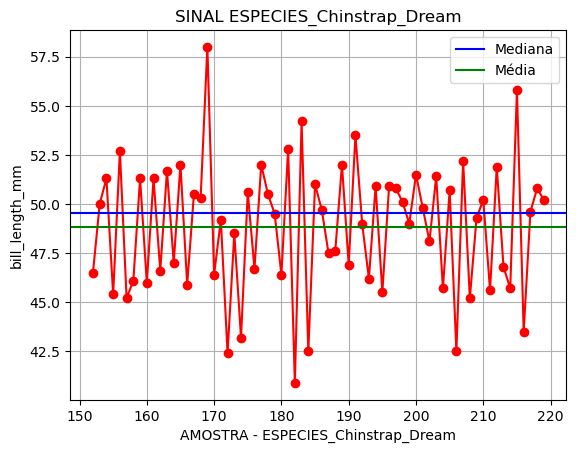

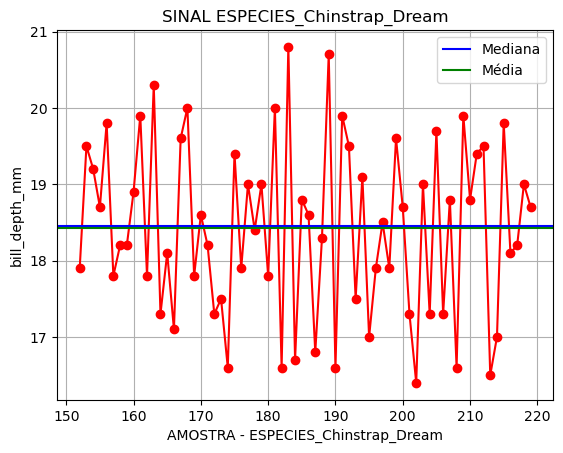

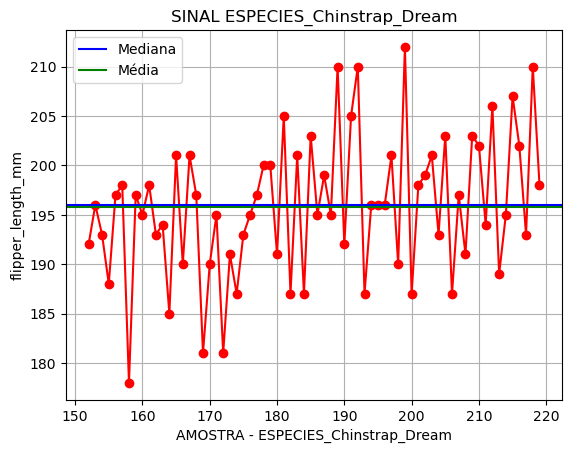

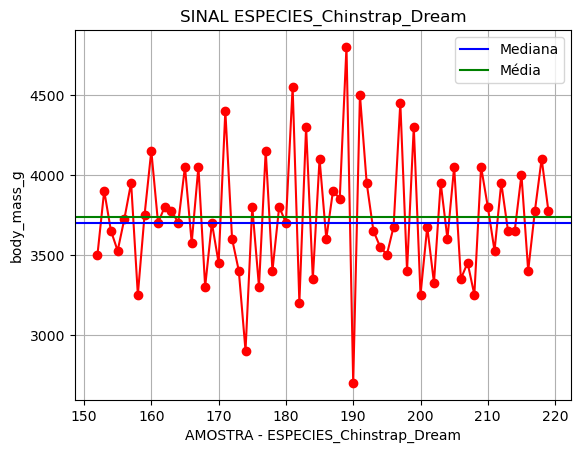

[[<Axes: title={'center': 'bill_length_mm'}>
  <Axes: title={'center': 'bill_depth_mm'}>]
 [<Axes: title={'center': 'flipper_length_mm'}>
  <Axes: title={'center': 'body_mass_g'}>]]


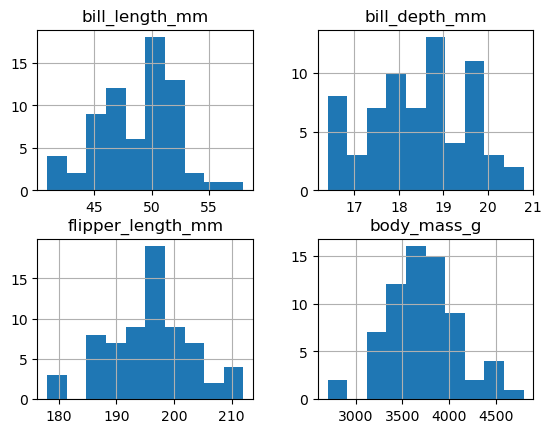

In [214]:
###################################################################################################################
print("="*80)
print("ESPECIES_Chinstrap_Dream.".center(80))
print("="*80)
print(ESPECIES_Chinstrap_Dream.describe())
for o in range(4):
    plt.plot(ESPECIES_Chinstrap_Dream[ESPECIES_Chinstrap_Dream.columns[o+2]], 'r', marker='o')
    plt.axhline(y=ESPECIES_Chinstrap_Dream[ESPECIES_Chinstrap_Dream.columns[o+2]].median(), color='b', label='Mediana')
    plt.axhline(y=ESPECIES_Chinstrap_Dream[ESPECIES_Chinstrap_Dream.columns[o+2]].mean(), color='g', label='Média')
    plt.title(f"SINAL ESPECIES_Chinstrap_Dream")
    plt.xlabel("AMOSTRA - ESPECIES_Chinstrap_Dream")
    plt.ylabel(f"{ESPECIES_Chinstrap_Dream.columns[o+2]}")
    plt.legend()
    plt.grid()
    plt.show()
print(ESPECIES_Chinstrap_Dream.hist())

#### Verificando bill_length_mm maior que 55 ou bill_length_mm menor que 45. da especie Chinstrap na ilha Dream

In [215]:
ESPECIES_Chinstrap_Dream.query("bill_length_mm > 55 or bill_length_mm < 45")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
169       2      1            58.0           17.8              181.0   
172       2      1            42.4           17.3              181.0   
174       2      1            43.2           16.6              187.0   
182       2      1            40.9           16.6              187.0   
184       2      1            42.5           16.7              187.0   
206       2      1            42.5           17.3              187.0   
215       2      1            55.8           19.8              207.0   
216       2      1            43.5           18.1              202.0   

     body_mass_g sex  
169       3700.0   1  
172       3600.0   1  
174       2900.0   1  
182       3200.0   1  
184       3350.0   1  
206       3350.0   1  
215       4000.0   0  
216       3400.0   1

#### Verificando bill_depth_mm maior que 20 ou bill_depth_mm menor que 17. da especie Chinstrap na ilha Dream

In [216]:
ESPECIES_Chinstrap_Dream.query("bill_depth_mm > 20 or bill_depth_mm < 17")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
163       2      1            51.7           20.3              194.0   
174       2      1            43.2           16.6              187.0   
182       2      1            40.9           16.6              187.0   
183       2      1            54.2           20.8              201.0   
184       2      1            42.5           16.7              187.0   
187       2      1            47.5           16.8              199.0   
189       2      1            52.0           20.7              210.0   
190       2      1            46.9           16.6              192.0   
202       2      1            48.1           16.4              199.0   
208       2      1            45.2           16.6              191.0   
213       2      1            46.8           16.5              189.0   

     body_mass_g sex  
163       3775.0   0  
174       2900.0   1  
182       3200.0   1  
183       4300.0   0  
184       3350.0   1  
187       3900.0   1  
189       4800.0   0  
190       2700.0   1  
202       3325.0   1  
208       3250.0   1  
213       3650.0   1

#### Verificando flipper_length_mm maior que 210 ou flipper_length_mm menor que 185. da especie Chinstrap na ilha Dream

In [217]:
ESPECIES_Chinstrap_Dream.query("flipper_length_mm < 185 or bill_depth_mm > 210")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
158       2      1            46.1           18.2              178.0   
169       2      1            58.0           17.8              181.0   
172       2      1            42.4           17.3              181.0   

     body_mass_g sex  
158       3250.0   1  
169       3700.0   1  
172       3600.0   1

#### Verificando body_mass_g maior que 4500 ou body_mass_g menor que 3000. da especie Chinstrap na ilha Dream

In [218]:
ESPECIES_Chinstrap_Dream.query("body_mass_g > 4500 or body_mass_g < 3000")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
174       2      1            43.2           16.6              187.0   
181       2      1            52.8           20.0              205.0   
189       2      1            52.0           20.7              210.0   
190       2      1            46.9           16.6              192.0   

     body_mass_g sex  
174       2900.0   1  
181       4550.0   0  
189       4800.0   0  
190       2700.0   1

#### Plotando os dados da especies Chinstrap na ilha Dream, do sexo Femea.

                        ESPECIES_Chinstrap_Dream: Femea.                        
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       34.000000      34.000000          34.000000    34.000000
mean        46.573529      17.588235         191.735294  3527.205882
std          3.108669       0.781128           5.754096   285.333912
min         40.900000      16.400000         178.000000  2700.000000
25%         45.425000      17.000000         187.250000  3362.500000
50%         46.300000      17.650000         192.000000  3550.000000
75%         47.375000      18.050000         195.750000  3693.750000
max         58.000000      19.400000         202.000000  4150.000000


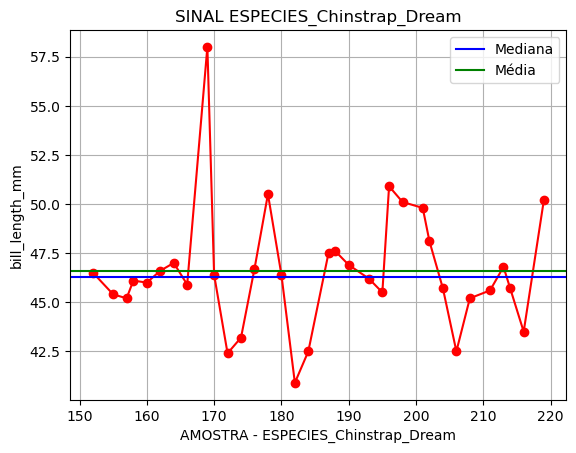

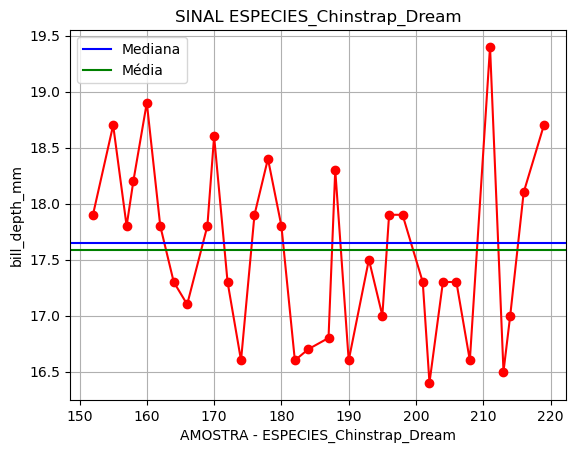

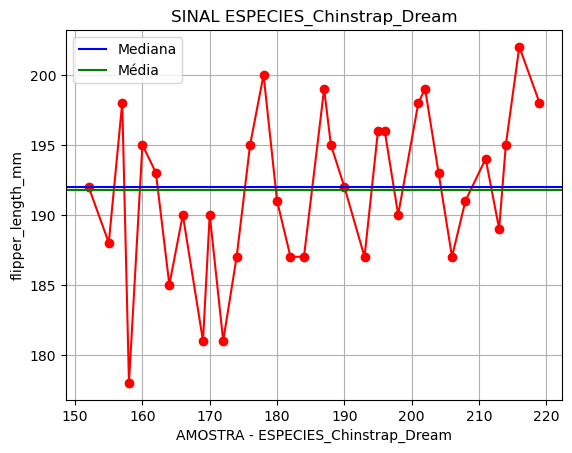

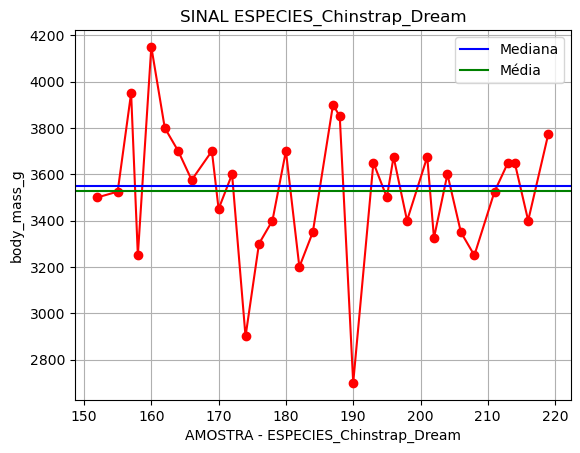

[[<Axes: title={'center': 'bill_length_mm'}>
  <Axes: title={'center': 'bill_depth_mm'}>]
 [<Axes: title={'center': 'flipper_length_mm'}>
  <Axes: title={'center': 'body_mass_g'}>]]


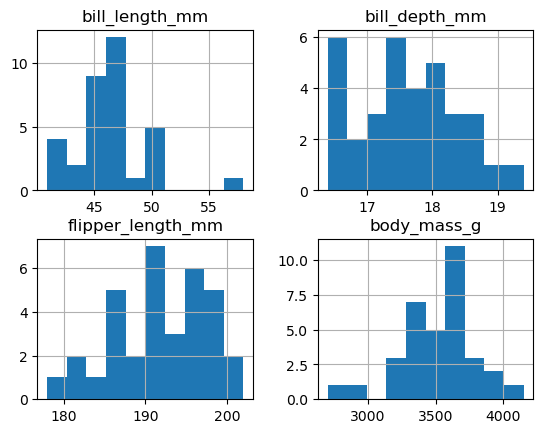

In [219]:
###################################################################################################################
print("="*80)
print("ESPECIES_Chinstrap_Dream: Femea.".center(80))
print("="*80)
    
ESPECIES_Chinstrap_Dream_copy = ESPECIES_Chinstrap_Dream
ESPECIES_Chinstrap_Dream_F = ESPECIES_Chinstrap_Dream.query("sex == 1")
print(ESPECIES_Chinstrap_Dream_F.describe())
for o in range(4):
    
    plt.plot(ESPECIES_Chinstrap_Dream_F[ESPECIES_Chinstrap_Dream.columns[o+2]], 'r', marker='o')
    plt.axhline(y=ESPECIES_Chinstrap_Dream_F[ESPECIES_Chinstrap_Dream.columns[o+2]].median(), color='b', label='Mediana')
    plt.axhline(y=ESPECIES_Chinstrap_Dream_F[ESPECIES_Chinstrap_Dream.columns[o+2]].mean(), color='g', label='Média')
    plt.title(f"SINAL ESPECIES_Chinstrap_Dream")
    plt.xlabel("AMOSTRA - ESPECIES_Chinstrap_Dream")
    plt.ylabel(f"{ESPECIES_Chinstrap_Dream.columns[o+2]}")
    plt.legend()
    plt.grid()
    plt.show()
print(ESPECIES_Chinstrap_Dream_F.hist())

#### Plotando os dados da especies Chinstrap na ilha Dream, do sexo Macho.

                        ESPECIES_Chinstrap_Dream: Macho.                        
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       34.000000      34.000000          34.000000    34.000000
mean        51.094118      19.252941         199.911765  3938.970588
std          1.564558       0.761273           5.976558   362.137550
min         48.500000      17.500000         187.000000  3250.000000
25%         50.050000      18.800000         196.000000  3731.250000
50%         50.950000      19.300000         200.500000  3950.000000
75%         51.975000      19.800000         203.000000  4100.000000
max         55.800000      20.800000         212.000000  4800.000000


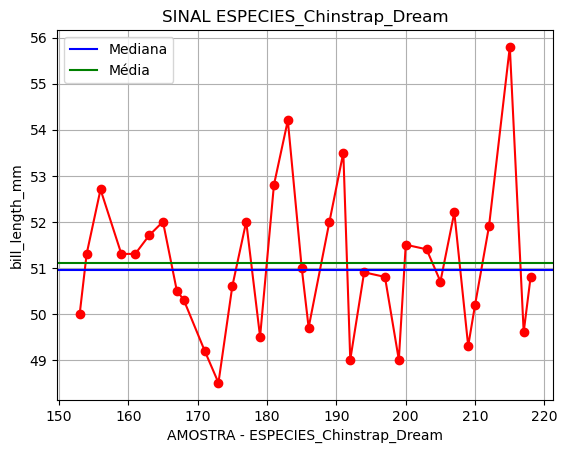

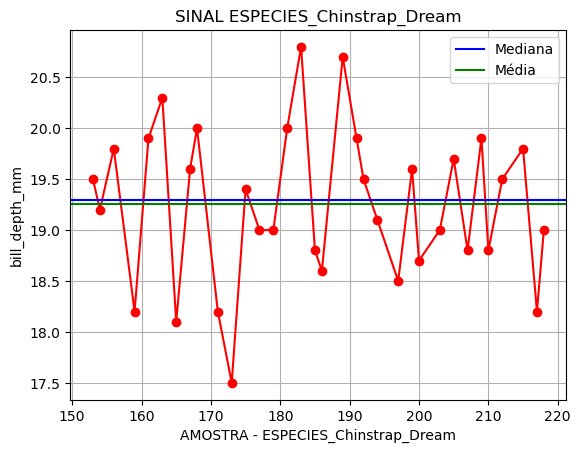

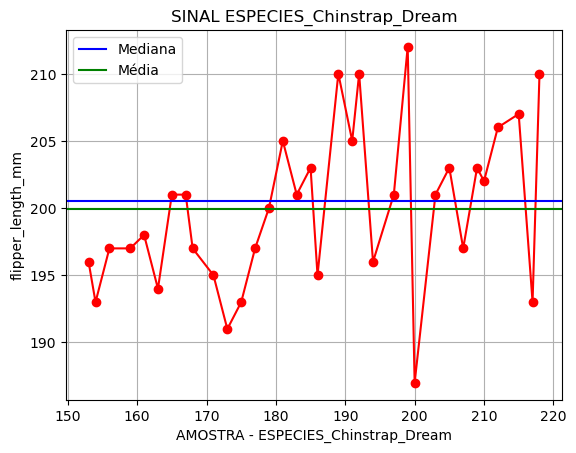

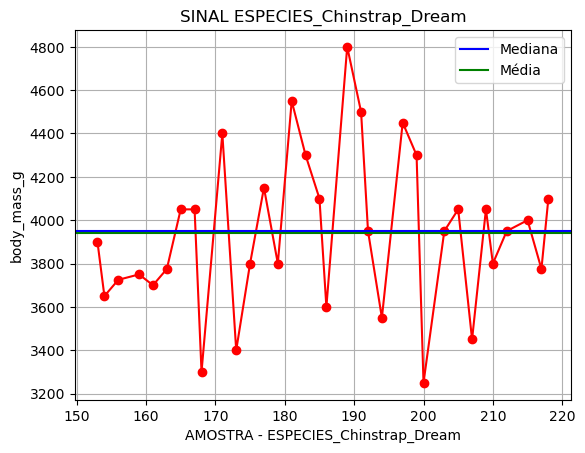

[[<Axes: title={'center': 'bill_length_mm'}>
  <Axes: title={'center': 'bill_depth_mm'}>]
 [<Axes: title={'center': 'flipper_length_mm'}>
  <Axes: title={'center': 'body_mass_g'}>]]


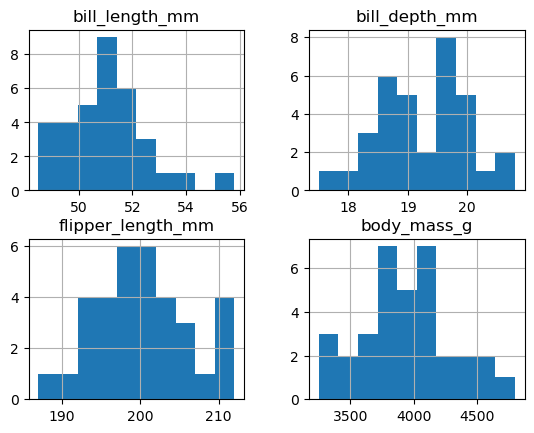

In [220]:
###################################################################################################################
print("="*80)
print("ESPECIES_Chinstrap_Dream: Macho.".center(80))
print("="*80)

ESPECIES_Chinstrap_Dream = ESPECIES_Chinstrap_Dream_copy
ESPECIES_Chinstrap_Dream_M = ESPECIES_Chinstrap_Dream.query("sex == 0")
print(ESPECIES_Chinstrap_Dream_M.describe())
for o in range(4):
    plt.plot(ESPECIES_Chinstrap_Dream_M[ESPECIES_Chinstrap_Dream.columns[o+2]], 'r', marker='o')
    plt.axhline(y=ESPECIES_Chinstrap_Dream_M[ESPECIES_Chinstrap_Dream.columns[o+2]].median(), color='b', label='Mediana')
    plt.axhline(y=ESPECIES_Chinstrap_Dream_M[ESPECIES_Chinstrap_Dream.columns[o+2]].mean(), color='g', label='Média')
    plt.title(f"SINAL ESPECIES_Chinstrap_Dream")
    plt.xlabel("AMOSTRA - ESPECIES_Chinstrap_Dream")
    plt.ylabel(f"{ESPECIES_Chinstrap_Dream.columns[o+2]}")
    plt.legend()
    plt.grid()
    plt.show()
print(ESPECIES_Chinstrap_Dream_M.hist())

#### Plotando os dados da especie Gentoo na ilha Biscoe.

                            ESPECIES_Gentoo_Biscoe.                             
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      123.000000     123.000000         123.000000   123.000000
mean        47.504878      14.982114         217.186992  5076.016260
std          3.081857       0.981220           6.484976   504.116237
min         40.900000      13.100000         203.000000  3950.000000
25%         45.300000      14.200000         212.000000  4700.000000
50%         47.300000      15.000000         216.000000  5000.000000
75%         49.550000      15.700000         221.000000  5500.000000
max         59.600000      17.300000         231.000000  6300.000000


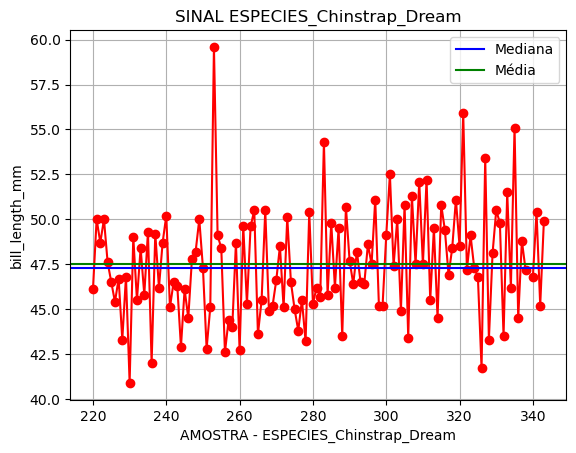

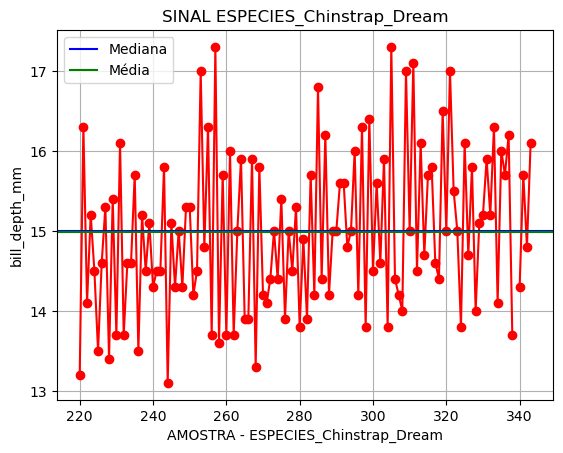

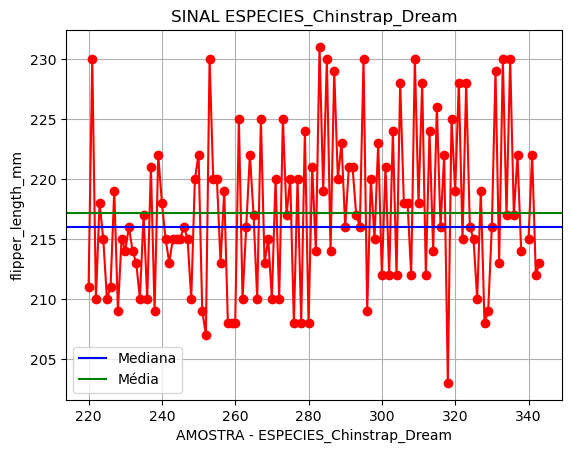

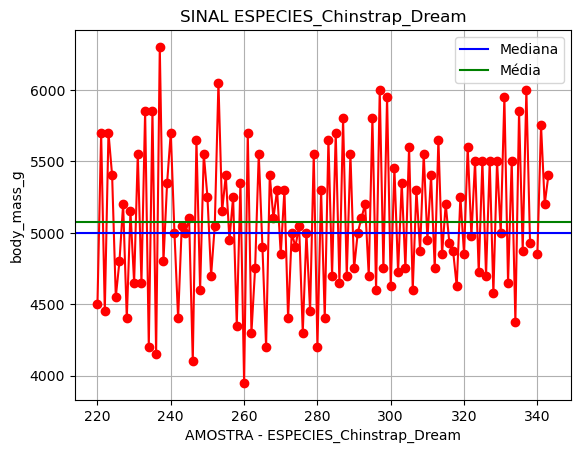

[[<Axes: title={'center': 'bill_length_mm'}>
  <Axes: title={'center': 'bill_depth_mm'}>]
 [<Axes: title={'center': 'flipper_length_mm'}>
  <Axes: title={'center': 'body_mass_g'}>]]


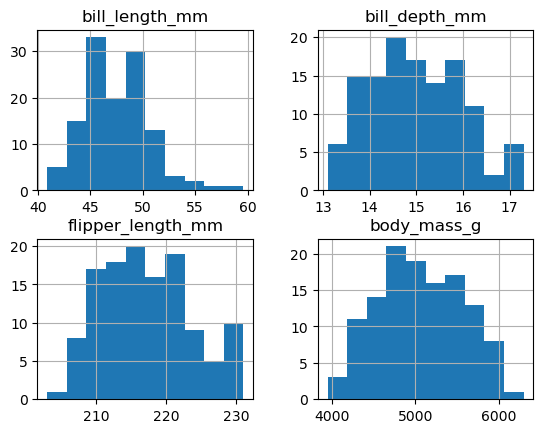

In [221]:
###################################################################################################################
print("="*80)
print("ESPECIES_Gentoo_Biscoe.".center(80))
print("="*80)
print(ESPECIES_Gentoo_Biscoe.describe())



for o in range(4):
    plt.plot(ESPECIES_Gentoo_Biscoe[ESPECIES_Gentoo_Biscoe.columns[o+2]], 'r', marker='o')
    plt.axhline(y=ESPECIES_Gentoo_Biscoe[ESPECIES_Gentoo_Biscoe.columns[o+2]].median(), color='b', label='Mediana')
    plt.axhline(y=ESPECIES_Gentoo_Biscoe[ESPECIES_Gentoo_Biscoe.columns[o+2]].mean(), color='g', label='Média')
    plt.title(f"SINAL ESPECIES_Chinstrap_Dream")
    plt.xlabel("AMOSTRA - ESPECIES_Chinstrap_Dream")
    plt.ylabel(f"{ESPECIES_Gentoo_Biscoe.columns[o+2]}")
    plt.legend()
    plt.grid()
    plt.show()
print(ESPECIES_Gentoo_Biscoe.hist())

#### Verificando bill_length_mm maior que 57. da especie Gentoo na ilha Biscoe.

In [222]:
ESPECIES_Gentoo_Biscoe.query("bill_length_mm > 57")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
253       1      0            59.6           17.0              230.0   

     body_mass_g sex  
253       6050.0   0

#### Verificando flipper_length_mm menor que 205. da especie Gentoo na ilha Biscoe.

In [223]:
ESPECIES_Gentoo_Biscoe.query("flipper_length_mm < 205")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
318       1      0            48.4           14.4              203.0   

     body_mass_g sex  
318       4625.0   1

#### Verificando body_mass_g menor que 4000 ou body_mass_g maior que 6100. da especie Gentoo na ilha Biscoe.

In [224]:
ESPECIES_Gentoo_Biscoe.query("body_mass_g < 4000 or body_mass_g > 6100")

species island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
237       1      0            49.2           15.2              221.0   
260       1      0            42.7           13.7              208.0   

     body_mass_g sex  
237       6300.0   0  
260       3950.0   1

#### Plotando os dados da especie Gentoo na ilha Biscoe. Femea

                        ESPECIES_Chinstrap_Dream: Femea.                        
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       58.000000      58.000000          58.000000    58.000000
mean        45.563793      14.237931         212.706897  4679.741379
std          2.051247       0.540249           3.897856   281.578294
min         40.900000      13.100000         203.000000  3950.000000
25%         43.850000      13.800000         210.000000  4462.500000
50%         45.500000      14.250000         212.000000  4700.000000
75%         46.875000      14.600000         215.000000  4875.000000
max         50.500000      15.500000         222.000000  5200.000000


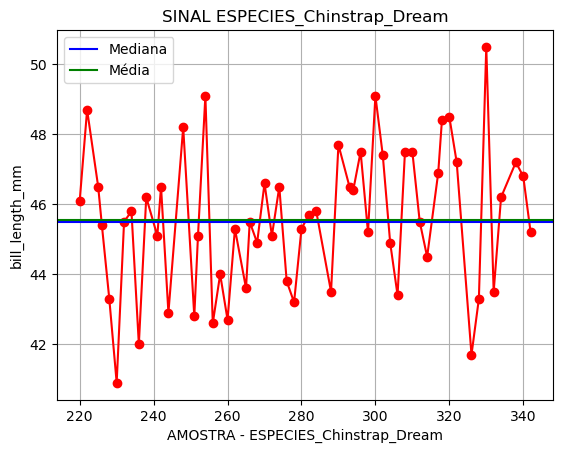

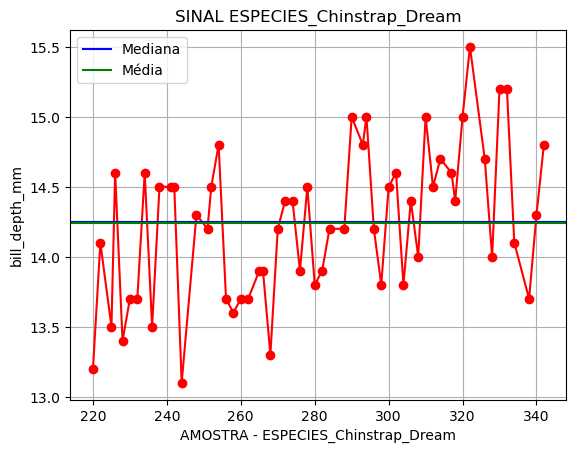

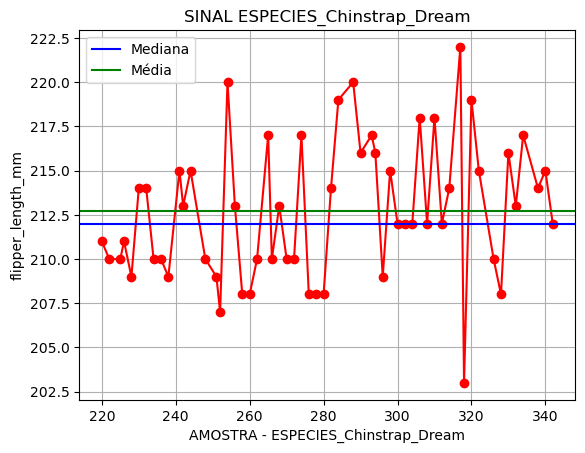

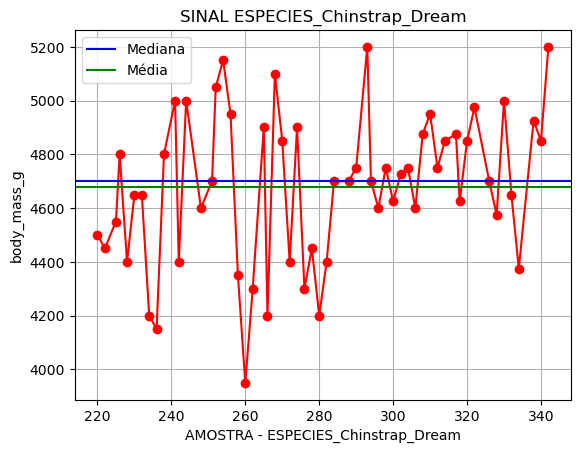

[[<Axes: title={'center': 'bill_length_mm'}>
  <Axes: title={'center': 'bill_depth_mm'}>]
 [<Axes: title={'center': 'flipper_length_mm'}>
  <Axes: title={'center': 'body_mass_g'}>]]


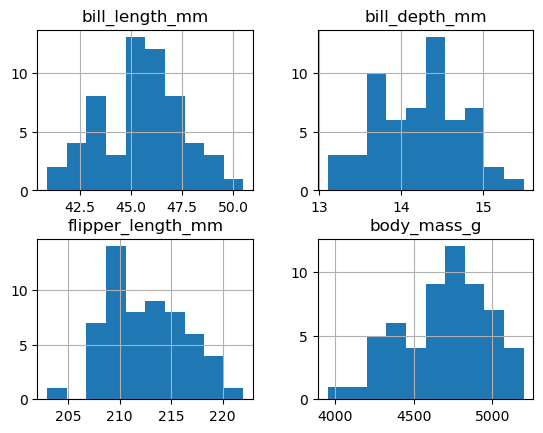

In [225]:
###################################################################################################################
print("="*80)
print("ESPECIES_Chinstrap_Dream: Femea.".center(80))
print("="*80)
    
ESPECIES_Gentoo_Biscoe_copy = ESPECIES_Gentoo_Biscoe
ESPECIES_Gentoo_Biscoe_F = ESPECIES_Gentoo_Biscoe.query("sex == 1")
print(ESPECIES_Gentoo_Biscoe_F.describe())
for o in range(4):
    
    plt.plot(ESPECIES_Gentoo_Biscoe_F[ESPECIES_Gentoo_Biscoe_F.columns[o+2]], 'r', marker='o')
    plt.axhline(y=ESPECIES_Gentoo_Biscoe_F[ESPECIES_Gentoo_Biscoe_F.columns[o+2]].median(), color='b', label='Mediana')
    plt.axhline(y=ESPECIES_Gentoo_Biscoe_F[ESPECIES_Gentoo_Biscoe_F.columns[o+2]].mean(), color='g', label='Média')
    plt.title(f"SINAL ESPECIES_Chinstrap_Dream")
    plt.xlabel("AMOSTRA - ESPECIES_Chinstrap_Dream")
    plt.ylabel(f"{ESPECIES_Gentoo_Biscoe_F.columns[o+2]}")
    plt.legend()
    plt.grid()
    plt.show()
print(ESPECIES_Gentoo_Biscoe_F.hist())

#### Plotando os dados da especie Gentoo na ilha Biscoe. Macho

                        ESPECIES_Chinstrap_Dream: Macho.                        
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       34.000000      34.000000          34.000000    34.000000
mean        51.094118      19.252941         199.911765  3938.970588
std          1.564558       0.761273           5.976558   362.137550
min         48.500000      17.500000         187.000000  3250.000000
25%         50.050000      18.800000         196.000000  3731.250000
50%         50.950000      19.300000         200.500000  3950.000000
75%         51.975000      19.800000         203.000000  4100.000000
max         55.800000      20.800000         212.000000  4800.000000


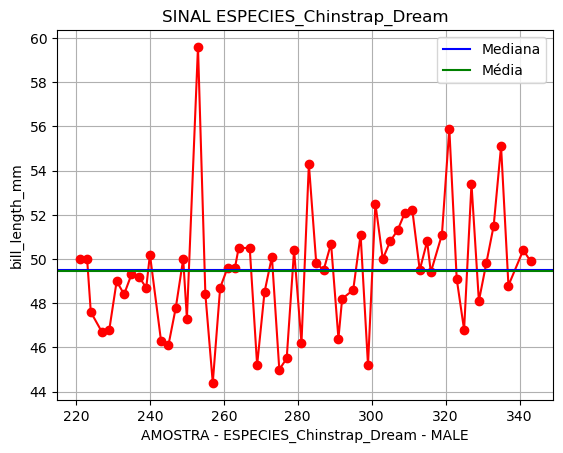

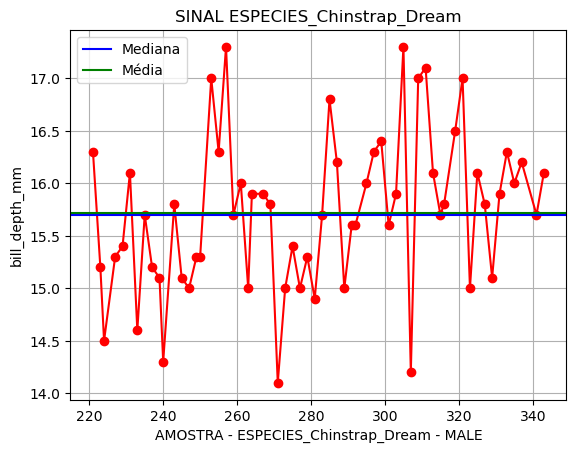

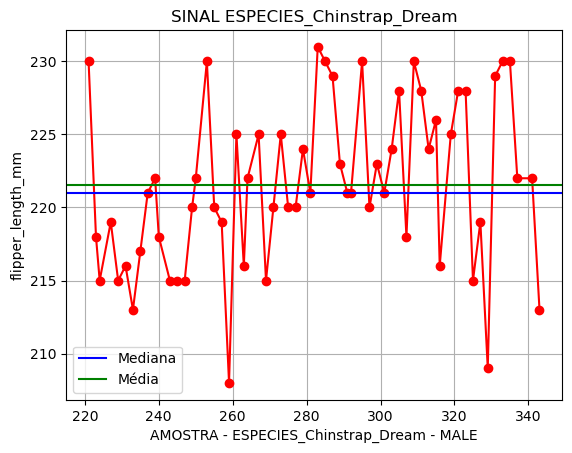

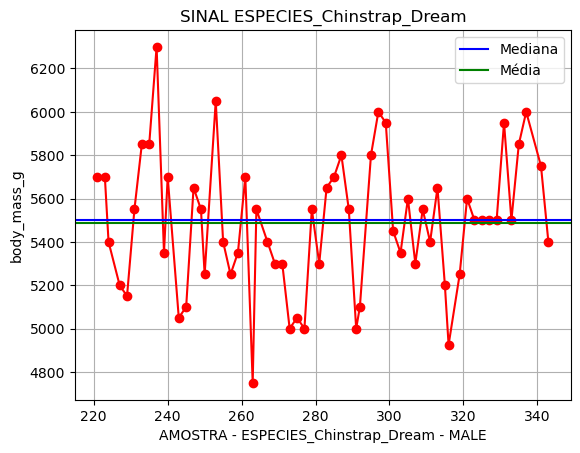

[[<Axes: title={'center': 'bill_length_mm'}>
  <Axes: title={'center': 'bill_depth_mm'}>]
 [<Axes: title={'center': 'flipper_length_mm'}>
  <Axes: title={'center': 'body_mass_g'}>]]


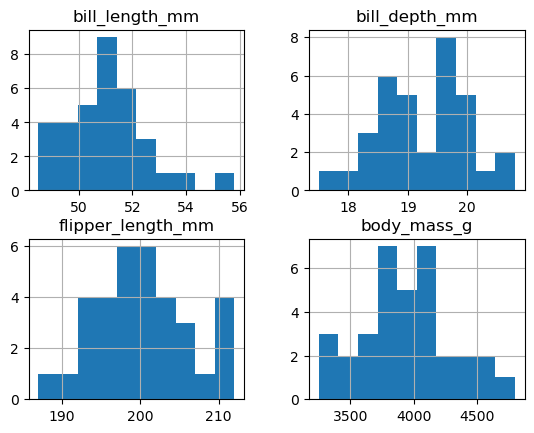

In [226]:
###################################################################################################################
print("="*80)
print("ESPECIES_Chinstrap_Dream: Macho.".center(80))
print("="*80)

ESPECIES_Gentoo_Biscoe = ESPECIES_Gentoo_Biscoe_copy
ESPECIES_Gentoo_Biscoe_M = ESPECIES_Gentoo_Biscoe.query("sex == 0")
print(ESPECIES_Chinstrap_Dream_M.describe())
for o in range(4):
    plt.plot(ESPECIES_Gentoo_Biscoe_M[ESPECIES_Gentoo_Biscoe_M.columns[o+2]], 'r', marker='o')
    plt.axhline(y=ESPECIES_Gentoo_Biscoe_M[ESPECIES_Gentoo_Biscoe_M.columns[o+2]].median(), color='b', label='Mediana')
    plt.axhline(y=ESPECIES_Gentoo_Biscoe_M[ESPECIES_Gentoo_Biscoe_M.columns[o+2]].mean(), color='g', label='Média')
    plt.title(f"SINAL ESPECIES_Chinstrap_Dream")
    plt.xlabel("AMOSTRA - ESPECIES_Chinstrap_Dream - MALE")
    plt.ylabel(f"{ESPECIES_Chinstrap_Dream.columns[o+2]}")
    plt.legend()
    plt.grid()
    plt.show()
print(ESPECIES_Chinstrap_Dream_M.hist())

#### Plotando os dados da especie Adelie na ilha Biscoe.

                                ESPECIES_Adelie.                                
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       44.000000      44.000000          44.000000    44.000000
mean        38.975000      18.370455         188.795455  3709.659091
std          2.480916       1.188820           6.729247   487.733722
min         34.500000      16.000000         172.000000  2850.000000
25%         37.675000      17.650000         184.750000  3387.500000
50%         38.700000      18.450000         189.500000  3750.000000
75%         40.700000      19.025000         193.000000  3975.000000
max         45.600000      21.100000         203.000000  4775.000000


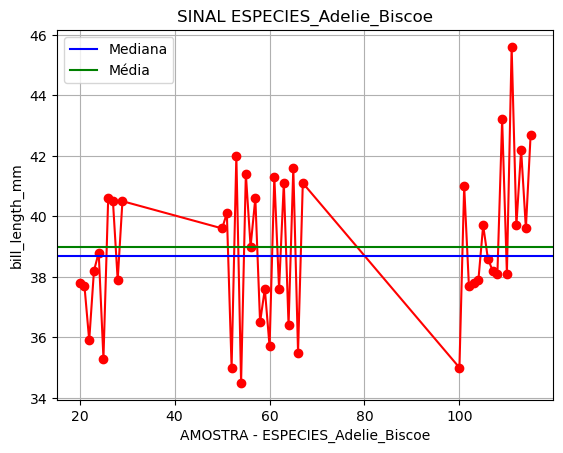

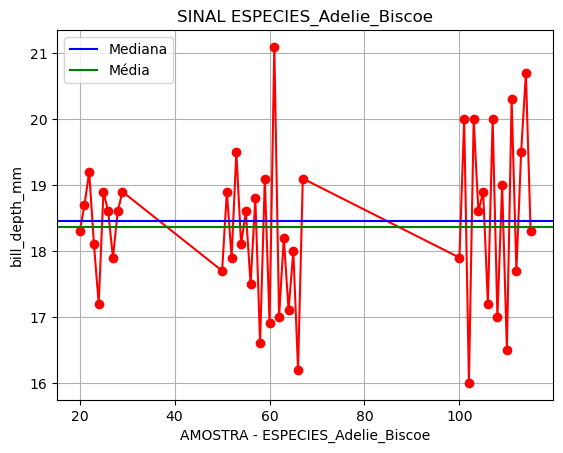

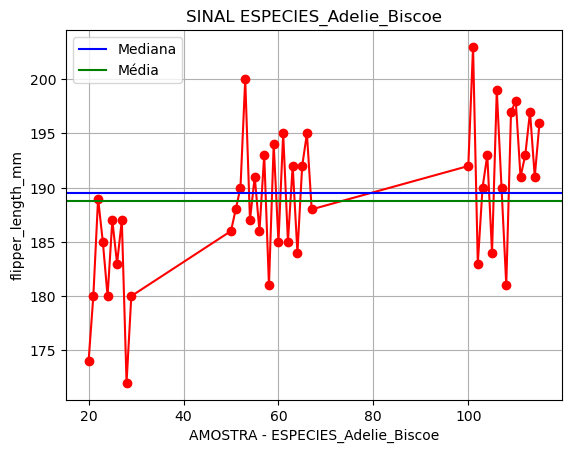

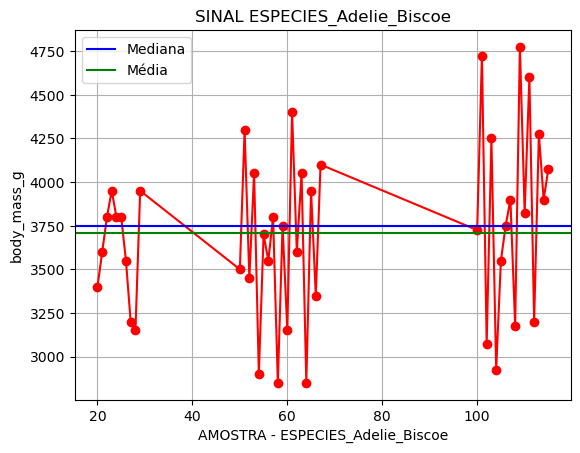

[[<Axes: title={'center': 'bill_length_mm'}>
  <Axes: title={'center': 'bill_depth_mm'}>]
 [<Axes: title={'center': 'flipper_length_mm'}>
  <Axes: title={'center': 'body_mass_g'}>]]


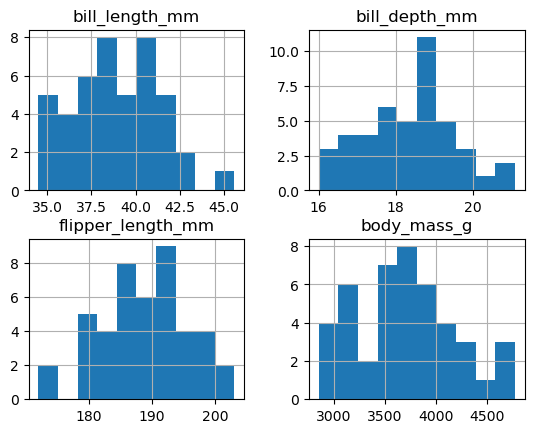

In [227]:
###################################################################################################################
print("="*80)
print("ESPECIES_Adelie.".center(80))
print("="*80)
print(ESPECIES_Adelie_Biscoe.describe())



for o in range(4):
    plt.plot(ESPECIES_Adelie_Biscoe[ESPECIES_Adelie_Biscoe.columns[o+2]], 'r', marker='o')
    plt.axhline(y=ESPECIES_Adelie_Biscoe[ESPECIES_Adelie_Biscoe.columns[o+2]].median(), color='b', label='Mediana')
    plt.axhline(y=ESPECIES_Adelie_Biscoe[ESPECIES_Adelie_Biscoe.columns[o+2]].mean(), color='g', label='Média')
    plt.title(f"SINAL ESPECIES_Adelie_Biscoe")
    plt.xlabel("AMOSTRA - ESPECIES_Adelie_Biscoe")
    plt.ylabel(f"{ESPECIES_Adelie_Biscoe.columns[o+2]}")
    plt.legend()
    plt.grid()
    plt.show()
print(ESPECIES_Adelie_Biscoe.hist())

#### Plotando os dados da especie Adelie na ilha Biscoe. Femea

                         ESPECIES_Adelie_Biscoe: Femea.                         
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       22.000000      22.000000          22.000000    22.000000
mean        37.359091      17.704545         187.181818  3369.318182
std          1.762212       1.091298           6.744567   343.470715
min         34.500000      16.000000         172.000000  2850.000000
25%         35.750000      17.000000         184.250000  3150.000000
50%         37.750000      17.700000         187.000000  3375.000000
75%         38.475000      18.250000         191.750000  3693.750000
max         40.500000      20.700000         199.000000  3900.000000


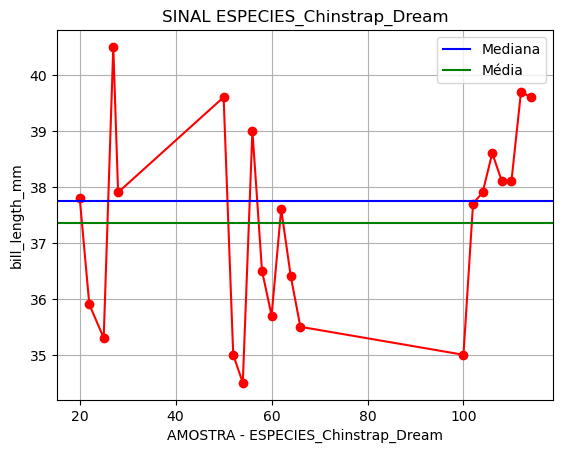

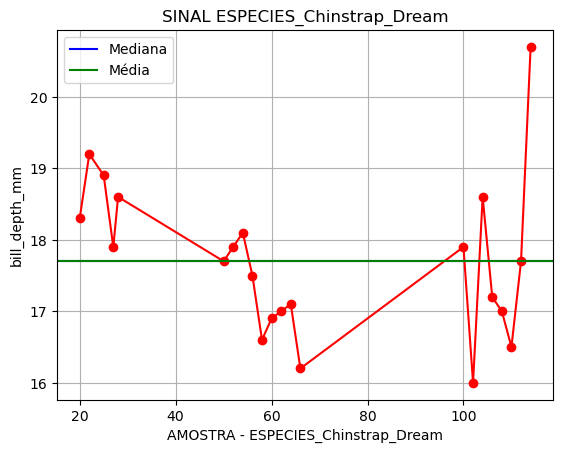

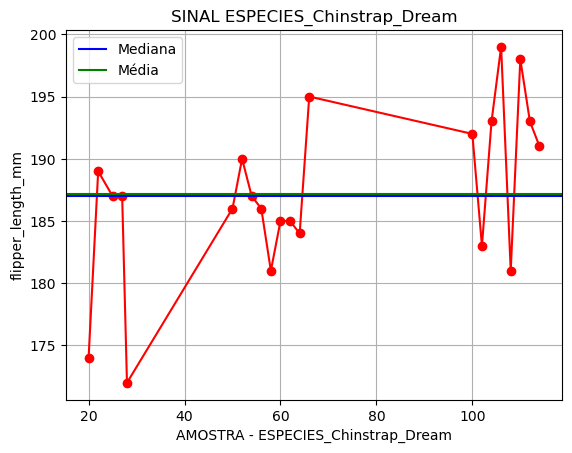

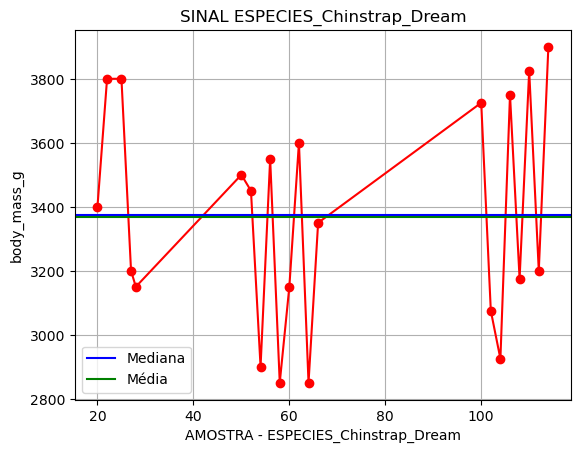

[[<Axes: title={'center': 'bill_length_mm'}>
  <Axes: title={'center': 'bill_depth_mm'}>]
 [<Axes: title={'center': 'flipper_length_mm'}>
  <Axes: title={'center': 'body_mass_g'}>]]


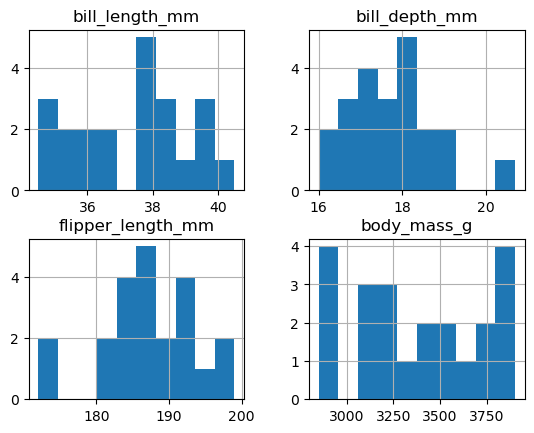

In [228]:
###################################################################################################################
print("="*80)
print("ESPECIES_Adelie_Biscoe: Femea.".center(80))
print("="*80)
    
ESPECIES_Adelie_Biscoe_copy = ESPECIES_Adelie_Biscoe
ESPECIES_Adelie_Biscoe_F = ESPECIES_Adelie_Biscoe.query("sex == 1")
print(ESPECIES_Adelie_Biscoe_F.describe())
for o in range(4):
    
    plt.plot(ESPECIES_Adelie_Biscoe_F[ESPECIES_Adelie_Biscoe_F.columns[o+2]], 'r', marker='o')
    plt.axhline(y=ESPECIES_Adelie_Biscoe_F[ESPECIES_Adelie_Biscoe_F.columns[o+2]].median(), color='b', label='Mediana')
    plt.axhline(y=ESPECIES_Adelie_Biscoe_F[ESPECIES_Adelie_Biscoe_F.columns[o+2]].mean(), color='g', label='Média')
    plt.title(f"SINAL ESPECIES_Chinstrap_Dream")
    plt.xlabel("AMOSTRA - ESPECIES_Chinstrap_Dream")
    plt.ylabel(f"{ESPECIES_Adelie_Biscoe_F.columns[o+2]}")
    plt.legend()
    plt.grid()
    plt.show()
print(ESPECIES_Adelie_Biscoe_F.hist())

#### Plotando os dados da especie Adelie na ilha Biscoe. Macho.

                         ESPECIES_Adelie_Biscoe: Macho.                         
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count       34.000000      34.000000          34.000000    34.000000
mean        51.094118      19.252941         199.911765  3938.970588
std          1.564558       0.761273           5.976558   362.137550
min         48.500000      17.500000         187.000000  3250.000000
25%         50.050000      18.800000         196.000000  3731.250000
50%         50.950000      19.300000         200.500000  3950.000000
75%         51.975000      19.800000         203.000000  4100.000000
max         55.800000      20.800000         212.000000  4800.000000


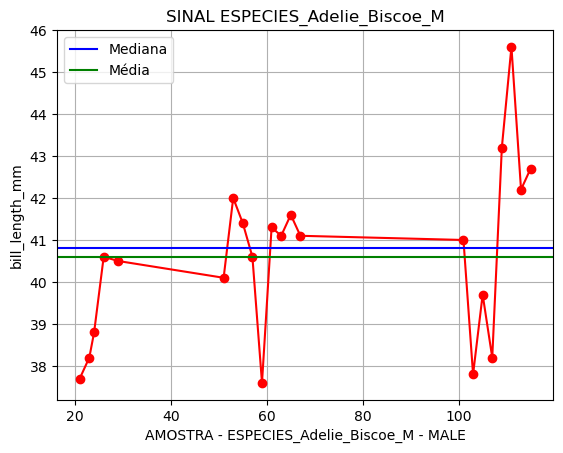

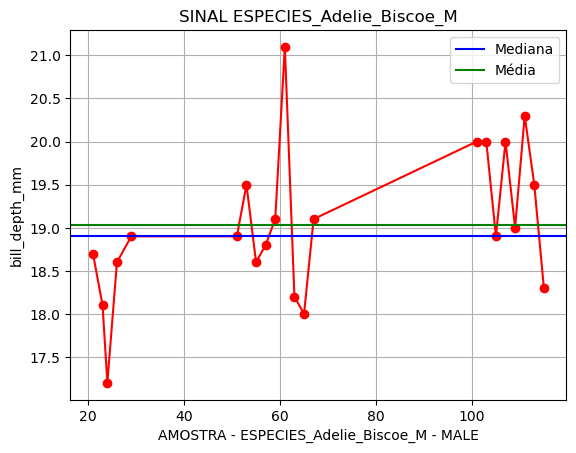

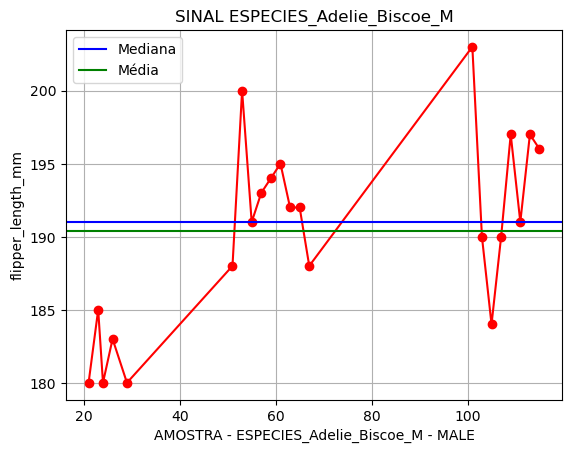

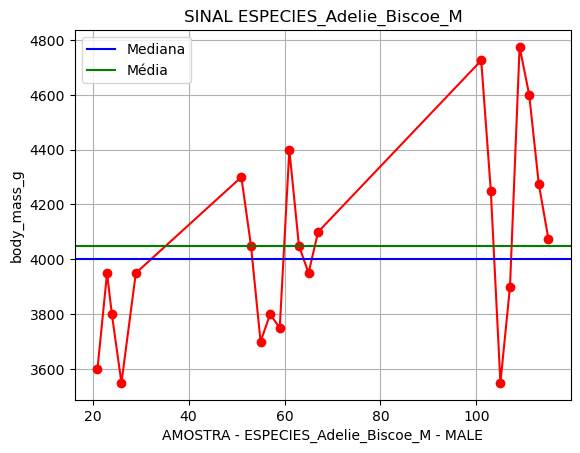

[[<Axes: title={'center': 'bill_length_mm'}>
  <Axes: title={'center': 'bill_depth_mm'}>]
 [<Axes: title={'center': 'flipper_length_mm'}>
  <Axes: title={'center': 'body_mass_g'}>]]


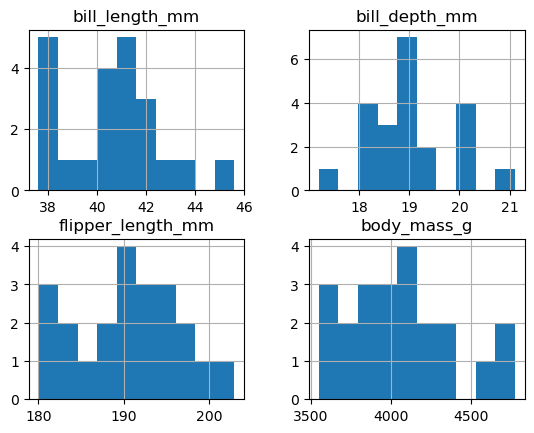

In [229]:
###################################################################################################################
print("="*80)
print("ESPECIES_Adelie_Biscoe: Macho.".center(80))
print("="*80)

ESPECIES_Adelie_Biscoe = ESPECIES_Adelie_Biscoe_copy
ESPECIES_Adelie_Biscoe_M = ESPECIES_Adelie_Biscoe.query("sex == 0")
print(ESPECIES_Chinstrap_Dream_M.describe())
for o in range(4):
    plt.plot(ESPECIES_Adelie_Biscoe_M[ESPECIES_Adelie_Biscoe_M.columns[o+2]], 'r', marker='o')
    plt.axhline(y=ESPECIES_Adelie_Biscoe_M[ESPECIES_Adelie_Biscoe_M.columns[o+2]].median(), color='b', label='Mediana')
    plt.axhline(y=ESPECIES_Adelie_Biscoe_M[ESPECIES_Adelie_Biscoe_M.columns[o+2]].mean(), color='g', label='Média')
    plt.title(f"SINAL ESPECIES_Adelie_Biscoe_M")
    plt.xlabel("AMOSTRA - ESPECIES_Adelie_Biscoe_M - MALE")
    plt.ylabel(f"{ESPECIES_Adelie_Biscoe_M.columns[o+2]}")
    plt.legend()
    plt.grid()
    plt.show()
print(ESPECIES_Adelie_Biscoe_M.hist())

In [230]:


# # permite modificar os parametros padros
# # matplot lib. Combina com numpy
# # update para atualizar os paramsn
# # pylab.rcParams.update(params)

# # ciborne lib. grafico de densidade.
# # hist = oculta hisgrama.
# # kde exibe as linhas.

# sns.distplot(ESPECIES_Chinstrap_Dream_M[ESPECIES_Chinstrap_Dream.columns[0+2]], hist = False, kde = True, color = 'red', label = 'x1')
# sns.distplot(ESPECIES_Chinstrap_Dream_M[ESPECIES_Chinstrap_Dream.columns[1+2]], hist = False, kde = True, color = 'green', label = 'x2')
# #sns.distplot(ESPECIES_Chinstrap_Dream_M[ESPECIES_Chinstrap_Dream.columns[2+2]], hist = False, kde = True, color = 'blue', label = 'x3')
# #sns.distplot(ESPECIES_Chinstrap_Dream_M[ESPECIES_Chinstrap_Dream.columns[3+2]], hist = False, kde = True, color = 'cyan', label = 'x4')

# plt.legend(fontsize = 20)
# plt.ylabel("Densidade")
# plt.xlabel("Variáveis")
# plt.suptitle('Distribuição Original', size = 20)
# plt.show()

lista = list(range(1, len(ESPECIES_Chinstrap_Dream), 1))

ESPECIES_Chinstrap_Dream[ESPECIES_Chinstrap_Dream.columns[2]].plot.scatter(lista, ESPECIES_Chinstrap_Dream.columns[2], color='b', label='Penguins')

In [231]:
# sns.heatmap(ESPECIES_Chinstrap_Dream.corr(), fmt=".2f", annot=True, center=0.0)

In [232]:
fig = px.scatter(ESPECIES_Chinstrap_Dream, x='bill_depth_mm', y='bill_length_mm',title="Penguins", color='body_mass_g')
fig.show()

In [233]:
fig = px.scatter_3d(ESPECIES_Chinstrap_Dream, x='bill_length_mm', y='bill_depth_mm', z='body_mass_g',title="Penguins", color='flipper_length_mm')
fig.show()

## 3)Tratamentos dos dados.

In [234]:
# Percorrendo por todos os erros.
for i in range(len(initial_data.iloc[row])):

    # Se a amostra for da especie: 0 - Adelie
    if(initial_data['species'].iloc[row[i]] == 0):
        # Se a epecie for da ilha: 1 - Dream    
        if(initial_data['island'].iloc[row[i]] == 1):
            print(initial_data.iloc[row[i]])
            """
            ESPECIES_Adelie_Dream.query("body_mass_g <= 3600  and bill_length_mm < 40.6")  # femea 
            
            """
            if(pd.isnull(initial_data['sex'].iloc[row[i]])):
                if((initial_data['body_mass_g'].iloc[row[i]] < 3700) and (initial_data['bill_length_mm'].iloc[row[i]] < 40.6)):
                    initial_data.at[row[i] , 'sex'] = int(1)
                    print("\n\tFemea\n")

            # percorre 6 colunas, a sexo será tratada em outra metodo
            """
            for a in range(6):
                # Se a coluna estiver nula
                if(pd.isnull(initial_data.iloc[row[i]].iloc[a])):
                    print("\n\n")
                    print(initial_data.iloc[row[i]].iloc[a])
                    # ESPECIES_Adelie_Dream.describe().loc['mean', ESPECIES_Adelie_Dream.columns[2]]
            """


        # Se a epecie for da ilha: 2 - Torgersen 
        if(initial_data['island'].iloc[row[i]] == 2):
            print(initial_data.iloc[row[i]])
            """
                Definir o sexo para os que tem valores. validos
                macho ESPECIES_Adelie_Torgersen.query("bill_depth_mm > 19.3") 
                femea ESPECIES_Adelie_Torgersen.query("bill_depth_mm < 19.3 and bill_length_mm < 37.9")

            """
            if(pd.isnull(initial_data['sex'].iloc[row[i]])):
                if(initial_data['bill_depth_mm'].iloc[row[i]] > 19.3):
                    initial_data.at[row[i] , 'sex'] = int(0)
                    # print("\n\tMacho\n")
                if((initial_data['bill_depth_mm'].iloc[row[i]] < 19.3) and (initial_data['bill_length_mm'].iloc[row[i]] < 37.9) and (initial_data['bill_length_mm'].iloc[row[i]] > 0 )):
                    initial_data.at[row[i] , 'sex'] = int(1)
                    # print(f"\n\tFemea: {initial_data['sex'].iloc[row[i]]}\n")

            # percorre 6 colunas, a sexo será tratada em outra metodo
            # incluir valores.
            for a in range(6):
                # Se a coluna estiver nula
                if(pd.isnull(initial_data.iloc[row[i]].iloc[a])):
                    # print("\n\n")
                    initial_data.at[row[i] , initial_data.columns[a]] = ESPECIES_Adelie_Torgersen.describe().loc['mean', ESPECIES_Adelie_Torgersen.columns[a]]
                    # print(initial_data.iloc[row[i]].iloc[a])

            if(pd.isnull(initial_data['sex'].iloc[row[i]])):
                if((initial_data['bill_depth_mm'].iloc[row[i]] > 18.4)  and  (initial_data['body_mass_g'].iloc[row[i]] >= 3650) and (initial_data['species'].iloc[row[i]] == 0) and (initial_data['island'].iloc[row[i]] == 2)):
                    initial_data.at[row[i] , 'sex'] = int(0)
                    print("\n\tMacho\n")
                if((initial_data['bill_depth_mm'].iloc[row[i]] < 19.3) and (initial_data['bill_length_mm'].iloc[row[i]] < 37.9) and (initial_data['bill_length_mm'].iloc[row[i]] > 0 )):
                    initial_data.at[row[i] , 'sex'] = int(1)
                    print(f"\n\tFemea: {initial_data['sex'].iloc[row[i]]}\n")
            


    # Se a amostra for da especie: 1 - Gentoo
    if(initial_data['species'].iloc[row[i]] == 1):

        # Se a epecie for da ilha: 0 - Biscoe 
        if(initial_data['island'].iloc[row[i]] == 0):
            print(initial_data.iloc[row[i]])
            """ 
                ESPECIES_Gentoo_Biscoe.query("bill_depth_mm > 15.50") macho 
                ESPECIES_Gentoo_Biscoe.query("bill_depth_mm < 15.50 and  body_mass_g < 4750") femea.
            """
            if(pd.isnull(initial_data['sex'].iloc[row[i]])):
                if((initial_data['bill_depth_mm'].iloc[row[i]] > 15.50)):
                    initial_data.at[row[i] , 'sex'] = int(0)
                    print("\n\tMacho\n")
                if((initial_data['bill_depth_mm'].iloc[row[i]] < 15.50) and (initial_data['body_mass_g'].iloc[row[i]] < 4750)):
                    initial_data.at[row[i] , 'sex'] = int(1)
                    print("\n\tFemea\n")
            
            # percorre 6 colunas, a sexo será tratada em outra metodo
            for a in range(6):
                # Se a coluna estiver nula
                if(pd.isnull(initial_data.iloc[row[i]].iloc[a])):
                    print("\n\n")
                    initial_data.at[row[i] , initial_data.columns[a]] = ESPECIES_Gentoo_Biscoe.describe().loc['mean', ESPECIES_Gentoo_Biscoe.columns[a]]
                    print(initial_data.iloc[row[i]].iloc[a])
                    # ESPECIES_Gentoo_Biscoe.describe().loc['mean', ESPECIES_Gentoo_Biscoe.columns[a]]
            
            if(pd.isnull(initial_data['sex'].iloc[row[i]])):
                if((initial_data['bill_depth_mm'].iloc[row[i]] > 14.7)):
                    initial_data.at[row[i] , 'sex'] = int(0)
                    print("\n\tMacho\n")
                if((initial_data['bill_depth_mm'].iloc[row[i]] < 14.7) and (initial_data['body_mass_g'].iloc[row[i]] < 4750)):
                    initial_data.at[row[i] , 'sex'] = int(1)
                    print("\n\tFemea\n")
                    
                    # 339	1	0	47.504878	14.982114	217.186992	5076.016260	NaN
            


species                0
island                 2
bill_length_mm       NaN
bill_depth_mm        NaN
flipper_length_mm    NaN
body_mass_g          NaN
sex                  NaN
Name: 3, dtype: object

	Macho

species                   0
island                    2
bill_length_mm         34.1
bill_depth_mm          18.1
flipper_length_mm     193.0
body_mass_g          3475.0
sex                     NaN
Name: 8, dtype: object
species                   0
island                    2
bill_length_mm         42.0
bill_depth_mm          20.2
flipper_length_mm     190.0
body_mass_g          4250.0
sex                     NaN
Name: 9, dtype: object
species                   0
island                    2
bill_length_mm         37.8
bill_depth_mm          17.1
flipper_length_mm     186.0
body_mass_g          3300.0
sex                     NaN
Name: 10, dtype: object
species                   0
island                    2
bill_length_mm         37.8
bill_depth_mm          17.3
flipper_length_mm     1

Convertendo os dados do tipo objeto para inteiro.

In [235]:
initial_data['species'] = initial_data['species'].astype(int)
initial_data['island'] = initial_data['island'].astype(int)
initial_data['sex'] = initial_data['sex'].astype(int)

### Dado tratados. 

In [236]:
initial_data.iloc[row]

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3          0       2       38.950980      18.429412         191.196078   
8          0       2       34.100000      18.100000         193.000000   
9          0       2       42.000000      20.200000         190.000000   
10         0       2       37.800000      17.100000         186.000000   
11         0       2       37.800000      17.300000         180.000000   
47         0       1       37.500000      18.900000         179.000000   
246        1       0       44.500000      14.300000         216.000000   
286        1       0       46.200000      14.400000         214.000000   
324        1       0       47.300000      13.800000         216.000000   
336        1       0       44.500000      15.700000         217.000000   
339        1       0       47.504878      14.982114         217.186992   

     body_mass_g  sex  
3    3706.372549    0  
8    3475.000000    1  
9    4250.000000    0  
10   3300.000000    1  
11   3700.000000    1  
47   2975.000000    1  
246  4100.000000    1  
286  4650.000000    1  
324  4725.000000    1  
336  4875.000000    0  
339  5076.016260    0

In [237]:
fig = px.scatter_3d(initial_data, x='bill_length_mm', y='bill_depth_mm', z='body_mass_g',title="Penguins", color='flipper_length_mm')
fig.show()

In [238]:
initial_data

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2       39.100000      18.700000         181.000000   
1          0       2       39.500000      17.400000         186.000000   
2          0       2       40.300000      18.000000         195.000000   
3          0       2       38.950980      18.429412         191.196078   
4          0       2       36.700000      19.300000         193.000000   
..       ...     ...             ...            ...                ...   
339        1       0       47.504878      14.982114         217.186992   
340        1       0       46.800000      14.300000         215.000000   
341        1       0       50.400000      15.700000         222.000000   
342        1       0       45.200000      14.800000         212.000000   
343        1       0       49.900000      16.100000         213.000000   

     body_mass_g  sex  
0    3750.000000    0  
1    3800.000000    1  
2    3250.000000    1  
3    3706.372549    0  
4    3450.000000    1  
..           ...  ...  
339  5076.016260    0  
340  4850.000000    1  
341  5750.000000    0  
342  5200.000000    1  
343  5400.000000    0  

[344 rows x 7 columns]

#### Soma dos valores nulos no dataframe.

In [239]:
initial_data.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [240]:
initial_data.dtypes

species                int32
island                 int32
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int32
dtype: object

## 4)Mineração dos dados.

In [241]:
initial_data.describe(include='all')

species      island  bill_length_mm  bill_depth_mm  \
count  344.000000  344.000000      344.000000     344.000000   
mean     0.755814    0.662791       43.917895      17.148580   
std      0.762626    0.726194        5.453687       1.973713   
min      0.000000    0.000000       32.100000      13.100000   
25%      0.000000    0.000000       39.200000      15.575000   
50%      1.000000    1.000000       44.450000      17.300000   
75%      1.000000    1.000000       48.500000      18.700000   
max      2.000000    2.000000       59.600000      21.500000   

       flipper_length_mm  body_mass_g         sex  
count         344.000000   344.000000  344.000000  
mean          200.934253  4202.855781    0.500000  
std            14.057944   801.450975    0.500728  
min           172.000000  2700.000000    0.000000  
25%           190.000000  3550.000000    0.000000  
50%           197.000000  4050.000000    0.500000  
75%           213.250000  4756.250000    1.000000  
max           231.000000  6300.000000    1.000000

In [242]:
print("------------------------------------------------")
print("\tExtraindo os valores dos dados coletados.")
"""
    Extraindo os seguintes valores.
        0 - Media
        1 - Mediana.
        2 - Desvio Padrão.
        3 - Variancia
        4 - Valor Minimo.
        5 - Valor maximo.
        6 - Amplitute.
        7 - Coeficiente da Variação.
        8 - Escore Z
        9 - Soma total.
"""
minerados = []

minerados.append(np.average(initial_data))
minerados.append(np.median(initial_data))
minerados.append(np.std(initial_data))
minerados.append(np.var(initial_data))
minerados.append(min(initial_data))
minerados.append(max(initial_data))
#minerados.append((max(initial_data) - min(initial_data)))
minerados.append((np.std(initial_data) / np.average(initial_data)))
#minerados.append(stats.zscore(initial_data))
minerados.append(np.sum(initial_data))
minerados

------------------------------------------------
	Extraindo os valores dos dados coletados.


[638.1107305911587,
 17.3,
 species                0.761517
 island                 0.725138
 bill_length_mm         5.445755
 bill_depth_mm          1.970842
 flipper_length_mm     14.037496
 body_mass_g          800.285227
 sex                    0.500000
 dtype: float64,
 species                   0.579908
 island                    0.525825
 bill_length_mm           29.656244
 bill_depth_mm             3.884218
 flipper_length_mm       197.051304
 body_mass_g          640456.444944
 sex                       0.250000
 dtype: float64,
 'bill_depth_mm',
 'species',
 species              0.001193
 island               0.001136
 bill_length_mm       0.008534
 bill_depth_mm        0.003089
 flipper_length_mm    0.021999
 body_mass_g          1.254148
 sex                  0.000784
 dtype: float64,
 species              2.600000e+02
 island               2.280000e+02
 bill_length_mm       1.510776e+04
 bill_depth_mm        5.899112e+03
 flipper_length_mm    6.912138e+04
 body_mass_g     

## Árvore de desição.

In [243]:
clf = DecisionTreeClassifier(criterion="entropy") #entropia é uma medida de caoticidade/'bagunça',
                                                    #utilizada para medir a mistura das classes dentro de uma regra,
                                                    #veremos ela logo
        
        
        
initial_dataAtributos = initial_data.drop('species', axis=1, inplace=False)
initial_dataAtributos = initial_dataAtributos.drop('sex', axis=1, inplace=False)
initial_dataAtributos = initial_dataAtributos.drop('island', axis=1, inplace=False)
initial_dataRotulos = initial_data['species'].copy()


clf.fit(initial_dataAtributos, initial_dataRotulos)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(150,100))
tree.plot_tree(clf, feature_names=initial_dataAtributos.columns, class_names={0:"Adelie",1:"Gentoo",2:"Chinstrap"}, ax=ax, filled=False)
print("")

### Especie = 0;

In [244]:
x = initial_data.query("flipper_length_mm <= 206.5 and bill_length_mm <= 43.35 and bill_length_mm <= 42.35 and bill_depth_mm >= 16.65")
x

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2        39.10000      18.700000         181.000000   
1          0       2        39.50000      17.400000         186.000000   
2          0       2        40.30000      18.000000         195.000000   
3          0       2        38.95098      18.429412         191.196078   
4          0       2        36.70000      19.300000         193.000000   
..       ...     ...             ...            ...                ...   
147        0       1        36.60000      18.400000         184.000000   
148        0       1        36.00000      17.800000         195.000000   
149        0       1        37.80000      18.100000         193.000000   
150        0       1        36.00000      17.100000         187.000000   
151        0       1        41.50000      18.500000         201.000000   

     body_mass_g  sex  
0    3750.000000    0  
1    3800.000000    1  
2    3250.000000    1  
3    3706.372549    0  
4    3450.000000    1  
..           ...  ...  
147  3475.000000    1  
148  3450.000000    1  
149  3750.000000    0  
150  3700.000000    1  
151  4000.000000    0  

[129 rows x 7 columns]

In [247]:
x.value_counts('species')

species
0    129
dtype: int64

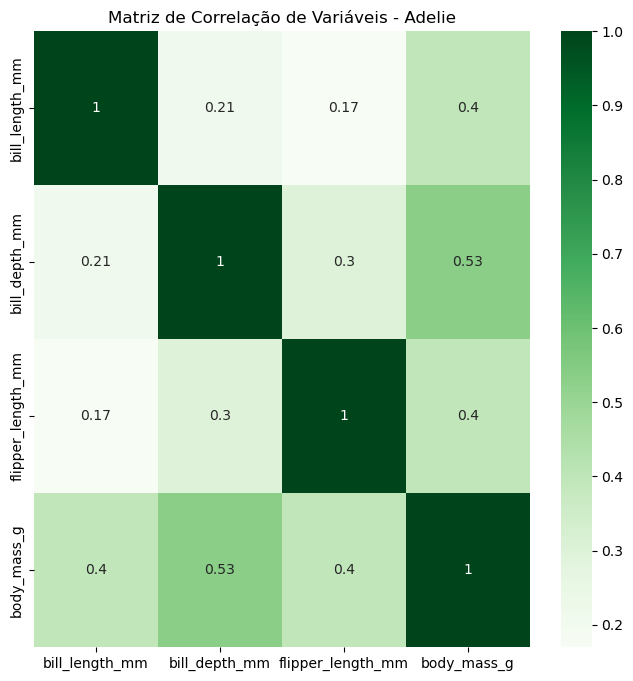

In [257]:
plt.figure(figsize = (8,8))
sns.heatmap(x.drop(['species','island','sex'], axis=1).corr(), annot = True, cmap = 'Greens');
plt.title(f"Matriz de Correlação de Variáveis - {PARAMETROS_ESPECIES[0]}")
plt.show()

In [258]:
fig = px.scatter_3d(x, x='bill_length_mm', y='bill_depth_mm', z='flipper_length_mm',title=f"Penguins - {PARAMETROS_ESPECIES[0]}", color='body_mass_g')
fig.show()

### Especie = 1;

In [245]:
y = initial_data.query("flipper_length_mm >= 206.5 and bill_depth_mm <= 17.65")
y

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
220        1       0       46.100000      13.200000         211.000000   
221        1       0       50.000000      16.300000         230.000000   
222        1       0       48.700000      14.100000         210.000000   
223        1       0       50.000000      15.200000         218.000000   
224        1       0       47.600000      14.500000         215.000000   
..       ...     ...             ...            ...                ...   
339        1       0       47.504878      14.982114         217.186992   
340        1       0       46.800000      14.300000         215.000000   
341        1       0       50.400000      15.700000         222.000000   
342        1       0       45.200000      14.800000         212.000000   
343        1       0       49.900000      16.100000         213.000000   

     body_mass_g  sex  
220   4500.00000    1  
221   5700.00000    0  
222   4450.00000    1  
223   5700.00000    0  
224   5400.00000    0  
..           ...  ...  
339   5076.01626    0  
340   4850.00000    1  
341   5750.00000    0  
342   5200.00000    1  
343   5400.00000    0  

[123 rows x 7 columns]

In [248]:
y.value_counts('species')

species
1    123
dtype: int64

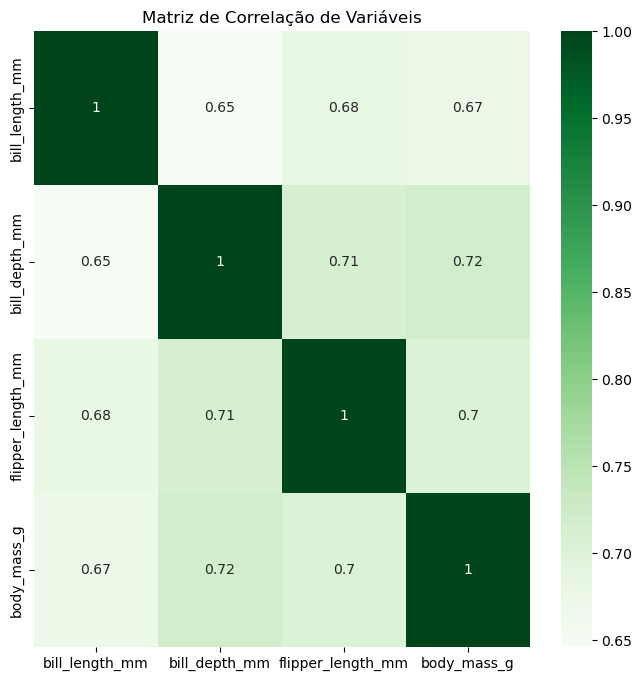

In [252]:
plt.figure(figsize = (8,8))
sns.heatmap(y.drop(['species','island','sex'], axis=1).corr(), annot = True, cmap = 'Greens');
plt.title(f"Matriz de Correlação de Variáveis - {PARAMETROS_ESPECIES[1]}")
plt.show()

In [259]:
fig = px.scatter_3d(y, x='bill_length_mm', y='bill_depth_mm', z='flipper_length_mm',title=f"Penguins - {PARAMETROS_ESPECIES[1]}", color='body_mass_g')
fig.show()

### Especie = 2;

In [246]:
# 190 - peso muito baixo.
z = initial_data.query("flipper_length_mm <= 206.5 and bill_length_mm >= 43.35 and body_mass_g <= 4125.0")
z

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
152        2       1            46.5           17.9              192.0   
153        2       1            50.0           19.5              196.0   
154        2       1            51.3           19.2              193.0   
155        2       1            45.4           18.7              188.0   
156        2       1            52.7           19.8              197.0   
157        2       1            45.2           17.8              198.0   
158        2       1            46.1           18.2              178.0   
159        2       1            51.3           18.2              197.0   
161        2       1            51.3           19.9              198.0   
162        2       1            46.6           17.8              193.0   
163        2       1            51.7           20.3              194.0   
164        2       1            47.0           17.3              185.0   
165        2       1            52.0           18.1              201.0   
166        2       1            45.9           17.1              190.0   
167        2       1            50.5           19.6              201.0   
168        2       1            50.3           20.0              197.0   
169        2       1            58.0           17.8              181.0   
170        2       1            46.4           18.6              190.0   
173        2       1            48.5           17.5              191.0   
175        2       1            50.6           19.4              193.0   
176        2       1            46.7           17.9              195.0   
178        2       1            50.5           18.4              200.0   
179        2       1            49.5           19.0              200.0   
180        2       1            46.4           17.8              191.0   
185        2       1            51.0           18.8              203.0   
186        2       1            49.7           18.6              195.0   
187        2       1            47.5           16.8              199.0   
188        2       1            47.6           18.3              195.0   
190        2       1            46.9           16.6              192.0   
193        2       1            46.2           17.5              187.0   
194        2       1            50.9           19.1              196.0   
195        2       1            45.5           17.0              196.0   
196        2       1            50.9           17.9              196.0   
198        2       1            50.1           17.9              190.0   
200        2       1            51.5           18.7              187.0   
201        2       1            49.8           17.3              198.0   
202        2       1            48.1           16.4              199.0   
203        2       1            51.4           19.0              201.0   
204        2       1            45.7           17.3              193.0   
205        2       1            50.7           19.7              203.0   
207        2       1            52.2           18.8              197.0   
208        2       1            45.2           16.6              191.0   
209        2       1            49.3           19.9              203.0   
210        2       1            50.2           18.8              202.0   
211        2       1            45.6           19.4              194.0   
212        2       1            51.9           19.5              206.0   
213        2       1            46.8           16.5              189.0   
214        2       1            45.7           17.0              195.0   
216        2       1            43.5           18.1              202.0   
217        2       1            49.6           18.2              193.0   
219        2       1            50.2           18.7              198.0   

     body_mass_g  sex  
152       3500.0    1  
153       3900.0    0  
154       3650.0    0  
155       3525.0    1  
156       3725.0    0  
157       39

In [249]:
z.value_counts('species')

species
2    51
dtype: int64

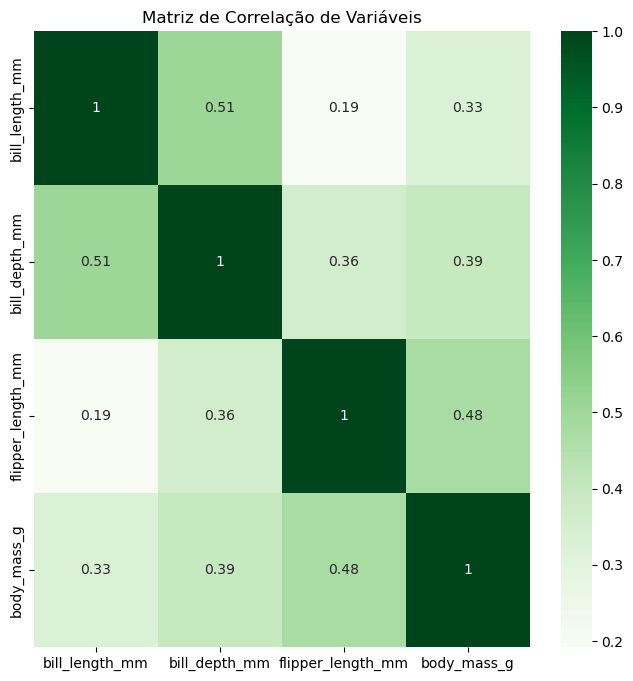

In [254]:
plt.figure(figsize = (8,8))
sns.heatmap(z.drop(['species','island','sex'], axis=1).corr(), annot = True, cmap = 'Greens');
plt.title(f"Matriz de Correlação de Variáveis - {PARAMETROS_ESPECIES[2]}")
plt.show()

In [260]:
fig = px.scatter_3d(z, x='bill_length_mm', y='bill_depth_mm', z='flipper_length_mm',title=f"Penguins - {PARAMETROS_ESPECIES[2]}", color='body_mass_g')
fig.show()